# Veridion Task - Nr. 5 POC Simulation (Data Analyst)

# 1. Entity Resolution

In [227]:
import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [228]:
df = pd.read_csv('/content/presales_data_sample.csv')

In [229]:
df.head()

,input_row_key,input_company_name,input_main_country_code,input_main_country,input_main_region,input_main_city,input_main_postcode,input_main_street,input_main_street_number,veridion_id,company_name,company_legal_names,company_commercial_names,main_country_code,main_country,main_region,main_city,main_postcode,main_street,main_street_number,main_latitude,main_longitude,locations,num_locations,company_type,year_founded,revenue,revenue_type,employee_count,employee_count_type,generated_description,generated_business_tags,short_description,long_description,business_tags,naics_2022_primary_code,naics_2022_primary_label,naics_2022_secondary_codes,naics_2022_secondary_labels,main_business_category,main_industry,main_sector,sics_codified_industry,sics_codified_industry_code,sics_codified_subsector,sics_codified_subsector_code,sics_codified_sector,sics_codified_sector_code,sic_codes,sic_labels,ibc_insurance_labels,isic_v4_codes,isic_v4_labels,nace_rev2_codes,nace_rev2_labels,ibc_insurance_codes,primary_phone,phone_numbers,primary_email,emails,other_emails,website_url,website_domain,website_tld,website_language_code,facebook_url,twitter_url,instagram_url,linkedin_url,ios_app_url,android_app_url,youtube_url,tiktok_url,technologies,created_at,last_updated_at
0,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,26e22210-93e5-11eb-b997-8dd98d09cf25,New Millennium Network,New Millennium Network Private Limited | MNET ...,New Millennium Network,PK,Pakistan,Sindh,Karachi,74400,NaN,NaN,NaN,NaN,"PK, Pakistan, Sindh, Karachi, 74400, , , 24.85...",1.0,Private,2001.0,311793.0,modelled,23.0,extracted,"MNET, incorporated in 2001, is a Pakistani com...",Mobile Top-up Services | Website Development |...,"Incorporated in 2001, MNET is the first compan...","Incorporated in 2001, MNET is the first compan...",Transfer Funds | Shop & Products | Managed Ser...,517810.0,All Other Telecommunications,NaN,NaN,Cable & Internet Providers,Telecommunication Services,IT&C Services,Media & Entertainment,SV-ME,Media,SV.1,Services,SV,7375 | 4899,Information Retrieval Services (Internet servi...,NaN,6190,Other telecommunications activities,61.9,Other telecommunications activities,NaN,9.233351e+11,+923335055787,NaN,NaN,NaN,https://www.mnet.com.pk/,mnet.com.pk,com.pk,en,NaN,NaN,NaN,http://www.linkedin.com/company/mnet-services-...,NaN,NaN,NaN,NaN,web servers: apache http server - 2 | javascri...,2020-02-25T14:47:51.000Z,2024-11-29T04:18:00.109Z
1,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,01004641-1dd8-11ef-9268-316fc8e174dd,Private Helipad Ali Villa,NaN,Private Helipad Ali Villa,PK,Pakistan,Sindh,Karachi,74400,NaN,NaN,NaN,NaN,"PK, Pakistan, Sindh, Karachi, 74400, , , 25.03...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,The Private Helipad Ali Villa is a heliport lo...,Air Transportation Services | Heliport Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-29T16:24:11.019Z,2025-04-20T15:03:24.026Z
2,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,8266efc1-13e7-11ec-aa14-7bf90e1e10f1,24seven Research Network,NaN,24seven Research Network,IN,India,Haryana,Faridabad,121001,Gurunanak Gali No. 3,3071,28.399705,77.286203,"IN, India, Haryana, Faridabad, 121001, Gurunan...",1.0,Private,NaN,518659.0,modelled,75.0,modelled,24seven Research Network is a market research ...,Market Research Services | Data Collection Ser...,We are the fastest growing market research com...,"With a team of highly skilled, qualified and m...",NaN,541910.0,Marketing Research and Public Opinion Polling,NaN,NaN,Market Research & Opinion Polling,Marketing & Advertising Agencies,Advertising & Marketing,Advertising & Marketing,SV-AD,Media,SV.1,Services,SV,8732,"Commercial Economic, Sociological, and Educati...",Strategic Consultants | Information Technology...,7320,Market research and public opi

## Entity Resolution Quality Check


### Input vs Output Consistency (Match Accuracy)

In [230]:
df.shape

(2951, 76)

We can see that our dataframe has 2951 rows, and we have 5 rows per business which means that we are dealing with 590 unique companies

In [231]:
# 1. Country Consistency
df["country_consistent"] = df["input_main_country"] == df["main_country"]

print("Country consistency (%):")
print(df["country_consistent"].value_counts(normalize=True) * 100)

inconsistent_countries = df[df["country_consistent"] == False][
    ["input_company_name", "input_main_country", "main_country", "company_name"]
].head(20)

print("--- Country inconsistencies ---")
inconsistent_countries

Country consistency (%):
country_consistent
True     67.265334
False    32.734666
Name: proportion, dtype: float64
--- Country inconsistencies ---


,input_company_name,input_main_country,main_country,company_name
2,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Pakistan,India,24seven Research Network
6,2OPERATE A/S,Denmark,NaN,CO 2 Operate
10,ACCENTURE SERVICES AS,Norway,Ireland,Accentures
11,ACCENTURE SERVICES AS,Norway,Slovakia,Accenture Bratislava Campus Office
12,ACCENTURE SERVICES AS,Norway,Mauritius,Accenture
14,ACCENTURE SERVICES AS,Norway,Canada,Accenture
15,COMBA TELECOM LIMITED,Hong Kong,United States,Comba Telecom Inc.
20,Comengineering Sdn. Bhd.,Malaysia,Italy,Metro Com Engineering S.p.A.
24,Comengineering Sdn. Bhd.,Malaysia,United Kingdom,COM Engineering Ltd.
27,COMMSCOPE SOLUTIONS SINGAPORE PTE. LTD.,Singapore,Mexico,CommScope


In [232]:
# 2. City Consistency
df["city_consistent"] = df["input_main_city"] == df["main_city"]

print("City consistency (%):")
print(df["city_consistent"].value_counts(normalize=True) * 100)

inconsistent_cities = df[df["city_consistent"] == False][
    ["input_company_name", "input_main_city", "main_city", "company_name"]
].head(20)

print("--- City inconsistencies ---")
inconsistent_cities

City consistency (%):
city_consistent
False    72.890546
True     27.109454
Name: proportion, dtype: float64
--- City inconsistencies ---


,input_company_name,input_main_city,main_city,company_name
2,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Karachi,Faridabad,24seven Research Network
3,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Karachi,NaN,EmerioSoft
4,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Karachi,Karachi Division,Asiatic Public Relations Network
5,2OPERATE A/S,Aalborg,Aalborg Municipality,2operate
6,2OPERATE A/S,Aalborg,NaN,CO 2 Operate
7,2OPERATE A/S,Aalborg,Herlev,Conzentrate
10,ACCENTURE SERVICES AS,Bærum,Dublin 2,Accentures
11,ACCENTURE SERVICES AS,Bærum,Bratislava,Accenture Bratislava Campus Office
12,ACCENTURE SERVICES AS,Bærum,Quatre Bornes,Accenture
13,ACCENTURE SERVICES AS,Bærum,Oslo,Accenture Norge


In [233]:
# 3. Name Consistency
df["name_consistent"] = df.apply(
    lambda row: (
        str(row["input_company_name"]).lower() in str(row["company_name"]).lower()
        or str(row["input_company_name"]).lower() in str(row["company_legal_names"]).lower()
        or str(row["input_company_name"]).lower() in str(row["company_commercial_names"]).lower()
    ),
    axis=1
)

print("Name consistency (%):")
print(df["name_consistent"].value_counts(normalize=True) * 100)

inconsistent_company_names = df[df["name_consistent"] == False][
    ["input_company_name", "company_name", "company_legal_names", "company_commercial_names"]
].head(10)

print("--- Name inconsistencies ---")
inconsistent_company_names

Name consistency (%):
name_consistent
False    87.936293
True     12.063707
Name: proportion, dtype: float64
--- Name inconsistencies ---


,input_company_name,company_name,company_legal_names,company_commercial_names
0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,New Millennium Network,New Millennium Network Private Limited | MNET ...,New Millennium Network
1,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Private Helipad Ali Villa,NaN,Private Helipad Ali Villa
2,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,24seven Research Network,NaN,24seven Research Network
3,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,EmerioSoft,NaN,Emeriosoft | EMERIOSOFT Private L.T.D.
4,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Asiatic Public Relations Network,Asiatic Public Relations Network Private Limited,Asiatic Public Relations Network | Asiatic Pub...
6,2OPERATE A/S,CO 2 Operate,CO2 Operate B.V.,CO 2 Operate
7,2OPERATE A/S,Conzentrate,Conzentrate A/S.,Conzentrate | Conzentrates
8,2OPERATE A/S,2A Pharma ApS.,2A Pharma ApS. | 2A Pharma AB.,NaN
9,2OPERATE A/S,RenSams Solutions,RenSams Solutions APS. | T RenSams Solutions IVS.,RenSams Solutions
10,ACCENTURE SERVICES AS,Accentures,Accenture Dienstleistungen GmbH,Accentures


 Input vs Output Consistency (Match Accuracy)

To evaluate the accuracy of Veridion’s entity resolution engine, I compared the client-provided attributes (company name, country, city) against the attributes returned by the engine.

- **Country consistency**: ~67%  
  In most cases, the country matched correctly. However, ~33% of cases pointed to different countries (e.g., `Pakistan → India`, `Norway → Ireland`). This often reflects differences between the client’s local entity and the headquarters location identified by Veridion.

- **City consistency**: ~27%  
  The majority of mismatches occur at the city level. For example, `Karachi → Faridabad` or `Aalborg → Herlev`. This suggests that while the correct company is often identified, Veridion tends to associate it with alternative offices rather than the exact city provided by the client.

- **Name consistency**: ~12%  
  Exact string matches between input and output names were rare. For example, `24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED → New Millennium Network` or `ACCENTURE SERVICES AS → Accenture`. In most cases, the engine returned either the legal entity name, a parent company, or a commercial name instead of the exact input string.

**Insight:**  
Veridion’s engine is strong at identifying the right entity, but the returned attributes often differ from client input due to HQ vs subsidiary mismatches, alternative naming conventions, or multiple office locations. While technically correct, these inconsistencies may be perceived by clients as inaccuracies. A stricter matching approach or additional filtering by location could improve perceived accuracy.


## Automated Best-Match Selection

To streamline the entity resolution process, I implemented an automated logic that evaluates multiple candidate companies per input row.  
The algorithm scores each candidate based on name similarity, country/city match, and website alignment, then selects the best available match or flags it as unmatched.


### Step 1: Helper functions for name normalization and similarity

- **normalize_name**: cleans a company name (lowercase, remove punctuation, replace `&`, strip legal suffixes)  
- **name_similarity**: computes similarity between two names (ignores word order)  
- **country_match**: checks if input country matches candidate (by code or name)  
- **city_region_match**: checks if input city/region matches candidate city/region or appears in locations  
- **website_match**: checks if `website_domain` and `website_url` confirm the brand  


In [234]:
df['input_company_name'].unique()

array(['24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED', '2OPERATE A/S',
       'ACCENTURE SERVICES AS', 'COMBA TELECOM LIMITED',
       'Comengineering Sdn. Bhd.',
       'COMMSCOPE SOLUTIONS SINGAPORE PTE. LTD.',
       'CommScope Technologies AG', 'COMMSCOPE TECHNOLOGIES LLC',
       'COMVIVA TECHNOLOGIES LIMITED', 'CONSCIA DANMARK A/S',
       'CONTROL RISKS GROUP LIMITED', 'CORPORATE COMMUNICATIONS AS',
       'COUPA SOFTWARE, INC.', 'Accutics ApS', 'COURSERA, INC.',
       'CRAYON A/S', 'CRAYON AS', 'CRAYON PTE. LTD.',
       'CROWDSTRIKE SERVICES, INC.', 'Searcher ApS',
       'CUSHMAN & WAKEFIELD SERVICES (THAILAND) CO., LTD.',
       'DADES Center Ost ApS', 'BONNIER BUSINESS PRESS A/S',
       'DAILY JURRAT', 'ACOME', 'Dansk Kredit Rad',
       'DANSK SUNDHEDSSIKRING KOMPLEMENTARSELSKAB ApS', 'DANSKE BANK A/S',
       'Dantec Nordics ApS', 'DEAS A/S', 'DEKO-STYLE V/ANJA GRONNE',
       'DELFI TECHNOLOGIES A/S', 'DELL AS',
       'Dell Corporation (Thailand) Co Ltd', 'DELL PRODUCTS',

In [235]:
LEGAL_SUFFIXES = [
    "inc", "inc.", "corp", "corp.", "corporation", "co", "co.", "company", "ltd", "ltd.", "limited",
    "llc", "llc.", "plc", "plc.", "gmbh", "srl", "s.r.l.", "sa", "s.a.", "pte", "pte.", "pvt", "pvt.",
    "(private) limited", "ag", "oy", "ab", "as", "a.s.", "bv", "nv", "kg", "kgaa", "spa", "s.p.a.", "kft",
    "oyj", "sasu", "sas", "sdn bhd", "sdn. bhd.", "sdn. bhd", "bhd", "sp z oo", "sp. z o.o.", "zrt", "zrt."
]

In [236]:
def normalize_name(name: str) -> str:
  """
    Normalizing a company name string for comparison.

    This function applies several cleaning steps to make company names
    easier to compare across different formats:

    - Converts text to lowercase.
    - Replaces '&' with the word 'and'.
    - Removes punctuation and non-alphanumeric characters.
    - Collapses multiple spaces into a single space and trims leading/trailing spaces.
    - Strips common legal suffixes (e.g. "Inc.", "Ltd", "GmbH", "Sdn Bhd")
    from the end of the name.

    Args:
      name (str): The raw company name to normalize.

    Returns:
      str: The normalized company name, without legal suffixes, punctuation,
      or inconsistent casing. Returns an empty string if the input is NaN.
  """

  if pd.isna(name):
    return ""
  s = name.lower()
  s = s.replace("&", "and")
  s = re.sub(r"[^a-z0-9\s]", " ", s)
  s = re.sub(r"\s+", " ", s).strip()
  for suf in sorted(LEGAL_SUFFIXES, key=len, reverse=True):
    s = re.sub(rf"\b{suf}\b$", "", s).strip()
  return s

In [237]:
def name_similarity(a: str, b: str) -> float:
  """
    Computing a similarity score between two company names.

    The function normalizes both names (lowercasing, removing punctuation,
    stripping legal suffixes) and compares them using a token-sorted
    string similarity. Word order does not affect the result, so
    "Business International Machines" and "International Business Machines"
    will be considered identical.

    Args:
        a (str): First company name.
        b (str): Second company name.

    Returns:
        float: A similarity score between 0.0 and 1.0
               (1.0 = identical, 0.0 = completely different).

    Examples:
        >>> name_similarity("Comengineering Sdn. Bhd.", "Comengineering")
        1.0
        >>> name_similarity("Apple Inc.", "Apple Incorporated")
        0.7  # approx
        >>> name_similarity("International Business Machines", "Business International Machines")
        1.0
  """
  a_n = normalize_name(a)
  b_n = normalize_name(b)
  if not a_n or not b_n:
    return 0.0
  a_sorted = " ".join(sorted(a_n.split()))
  b_sorted = " ".join(sorted(b_n.split()))
  return SequenceMatcher(None, a_sorted, b_sorted).ratio()

In [238]:
def country_match(row) -> bool:
  """
    Check if the input country matches the candidate country.

    Compares both the country code (e.g., "US", "RO") and
    the full country name (case-insensitive). Returns True
    if either matches, False otherwise.
  """
  in_code = str(row.get("input_main_country_code")or "").strip().upper()
  ver_code = str(row.get("main_country_code")or "").strip().upper()
  in_country = str(row.get("input_main_country")or "").strip().lower()
  ver_country = str(row.get("main_country")or "").strip().lower()
  match_code = (in_code and ver_code and in_code == ver_code)
  match_name = (in_country and ver_country and in_country == ver_country)
  return bool(match_code or match_name)

In [239]:
def city_region_match(row) -> bool:
  """
    Check if the input city or region matches the candidate.

    City takes priority: if an input city exists, it must match either
    the main city or appear in the candidate's locations. If no city is
    provided, the region is checked instead. Returns True if a match is
    found, False otherwise.
  """
  in_city = str(row.get("input_main_city") or "").strip().lower()
  in_region = str(row.get("input_main_region") or "").strip().lower()
  main_city = str(row.get("main_city") or "").strip().lower()
  main_region = str(row.get("main_region") or "").strip().lower()
  locations = str(row.get("locations") or "").lower()

  city_ok = (in_city and (in_city == main_city or in_city in locations))
  region_ok = (in_region and (in_region == main_region or in_region in locations))
  if in_city:
    return bool(city_ok)
  else:
    return bool(region_ok)
  return False

In [240]:
def website_match(row) -> bool:
  """
    Check if the website domain matches the website URL.

    Normalizes both fields (lowercase, removes http/https, strips 'www.')
    and returns True if one is contained in the other, False otherwise.
  """
  dom = str(row.get("website_domain") or "").lower().replace("www.", "")
  url = str(row.get("website_url") or "").lower().replace("https://", "").replace("http://", "")
  if dom and (dom in url or url in dom):
    return True
  return False

### Step 2: Compute matching signals for each candidate row

- **name_score**: best similarity between `input_company_name` and the candidate's  
  `company_name` / `company_legal_names` / `company_commercial_names`  
- **country_match**: True if input country matches candidate country (code or name)  
- **city_region_match**: True if input city/region matches candidate city/region or appears in `locations`  
- **website_match**: True if `website_domain` and `website_url` confirm the brand  


In [241]:
df["name_score"] = df.apply(
    lambda r: max(
        name_similarity(r.get("input_company_name", ""), r.get("company_name", "")),
        name_similarity(r.get("input_company_name", ""), r.get("company_legal_names", "")),
        name_similarity(r.get("input_company_name", ""), r.get("company_commercial_names", "")),
    ),
    axis=1
)
df["country_match"] = df.apply(country_match, axis=1)
df["city_region_match"] = df.apply(city_region_match, axis=1)
df["website_match"] = df.apply(website_match, axis=1)

### Step 3: Compute a weighted total_score for each candidate

We combine all matching signals into a single score, using different weights
to reflect their importance:

- **Name similarity**: 0.60 (most important)  
- **Country match**: 0.25 (almost mandatory)  
- **City/region**: 0.10 (helpful but not decisive)  
- **Website match**: 0.20 (strong confirmation of the brand)  

The final score is clipped to a maximum of **1.0**.  


In [242]:
W_NAME = 0.60
W_COUNTRY = 0.25
W_CITY = 0.10
W_WEB = 0.20
df["total_score"] = (
    W_NAME * df["name_score"]
  + W_COUNTRY * df["country_match"].astype(int)
  + W_CITY * df["city_region_match"].astype(int)
  + W_WEB * df["website_match"].astype(int)
).clip(upper=1.0)

### Step 4: Classify each candidate row

Each candidate is labeled as either **CANDIDATE_MATCH** or **CANDIDATE_UNLIKELY**
based on name, country, website, city/region, and the total score:

- **CANDIDATE_MATCH** if:
  - Name score ≥ 0.80 **and** country matches, OR  
  - Website confirms + country matches + name score ≥ 0.50, OR  
  - Total score ≥ 0.85  
- **CANDIDATE_MATCH** also if:
  - Name score is borderline (≥ 0.65) **and** country matches **and** (website or city matches)  
- Otherwise → **CANDIDATE_UNLIKELY**

The classification is applied row by row and stored in a new column `candidate_status`.


In [243]:
def decide_candidate_status(row):
  name_ok = row["name_score"] >= 0.80
  name_border = row["name_score"] >= 0.65
  country_ok = bool(row["country_match"])
  website_ok = bool(row["website_match"])
  city_ok = bool(row["city_region_match"])
  score = row["total_score"]

  if (name_ok and country_ok) or (website_ok and country_ok and row["name_score"] > 0.50) or score >= 0.85:
    return "CANDIDATE_MATCH"
  if name_border and country_ok and (website_ok or city_ok):
    return "CANDIDATE_MATCH"
  return "CANDIDATE_UNLIKELY"

df["candidate_status"] = df.apply(decide_candidate_status, axis=1)

### Step 5: Select the best match per `input_row_key` and record the reason

For each input row (grouped by `input_row_key`), we:
1. Sort candidates by `candidate_status` and descending `total_score`.
2. Prefer rows labeled **CANDIDATE_MATCH**; if none exist, fall back to the top-scoring candidate.
3. Build a human-readable `match_reason`:
   - Name quality: `name=exact` / `name=close` / `name=weak`
   - Signals present: `country ok`, `city/region ok`, `website ok`

We then return a one-line summary per input:
- `best_veridion_id`, `best_company_name`
- `best_total_score`, `best_name_score`
- `best_candidate_status`
- `match_reason`


In [244]:
def best_reason(group: pd.DataFrame) -> pd.Series:
    g = group.sort_values(["candidate_status", "total_score"], ascending=[True, False])
    matched = g[g["candidate_status"] == "CANDIDATE_MATCH"]
    top = matched.iloc[0] if not matched.empty else g.iloc[0]

    reasons = []
    if top["name_score"] >= 0.80: reasons.append("name=exact")
    elif top["name_score"] >= 0.65: reasons.append("name=close")
    else: reasons.append("name=weak")
    if top["country_match"]: reasons.append("country ok")
    if top["city_region_match"]: reasons.append("city/region ok")
    if top["website_match"]: reasons.append("website ok")

    return pd.Series({
        "best_veridion_id": top.get("veridion_id"),
        "best_company_name": top.get("company_name"),
        "best_total_score": float(top["total_score"]),
        "best_name_score": float(top["name_score"]),
        "best_candidate_status": top["candidate_status"],
        "match_reason": ", ".join(reasons)
    })

best_by_input = df.groupby("input_row_key", as_index=False).apply(best_reason)

/tmp/ipython-input-229753746.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_by_input = df.groupby("input_row_key", as_index=False).apply(best_reason)


### Step 6: Assign final match status per input

Using the best candidate from Step 6, we assign a final status:

- **MATCHED** if candidate is labeled `CANDIDATE_MATCH` and has `best_total_score ≥ 0.70`  
- **UNMATCHED** if `best_total_score < 0.55`  
- **BEST_GUESS** otherwise (uncertain zone)

The result is stored in a new column `match_status` for each input row.


In [245]:
def final_status(row):
    if row["best_candidate_status"] == "CANDIDATE_MATCH" and row["best_total_score"] >= 0.70:
        return "MATCHED"
    if row["best_total_score"] < 0.55:
        return "UNMATCHED"
    return "BEST_GUESS"

best_by_input["match_status"] = best_by_input.apply(final_status, axis=1)

In [246]:
# EXPORT
candidates_out = "/content/veridion_candidates_scored.csv"
best_out = "/content/veridion_best_matches_per_input.csv"
df.merge(
    best_by_input[["input_row_key","best_veridion_id","best_company_name","best_total_score",
                   "best_name_score","best_candidate_status","match_reason","match_status"]],
    on="input_row_key", how="left"
).to_csv(candidates_out, index=False)
best_by_input.to_csv(best_out, index=False)

print("Saved:", candidates_out, "and", best_out)

Saved: /content/veridion_candidates_scored.csv and /content/veridion_best_matches_per_input.csv


# 2. Data Analysis and QC

In [247]:
df.shape

(2951, 85)

In [248]:
df.tail()

,input_row_key,input_company_name,input_main_country_code,input_main_country,input_main_region,input_main_city,input_main_postcode,input_main_street,input_main_street_number,veridion_id,company_name,company_legal_names,company_commercial_names,main_country_code,main_country,main_region,main_city,main_postcode,main_street,main_street_number,main_latitude,main_longitude,locations,num_locations,company_type,year_founded,revenue,revenue_type,employee_count,employee_count_type,generated_description,generated_business_tags,short_description,long_description,business_tags,naics_2022_primary_code,naics_2022_primary_label,naics_2022_secondary_codes,naics_2022_secondary_labels,main_business_category,main_industry,main_sector,sics_codified_industry,sics_codified_industry_code,sics_codified_subsector,sics_codified_subsector_code,sics_codified_sector,sics_codified_sector_code,sic_codes,sic_labels,ibc_insurance_labels,isic_v4_codes,isic_v4_labels,nace_rev2_codes,nace_rev2_labels,ibc_insurance_codes,primary_phone,phone_numbers,primary_email,emails,other_emails,website_url,website_domain,website_tld,website_language_code,facebook_url,twitter_url,instagram_url,linkedin_url,ios_app_url,android_app_url,youtube_url,tiktok_url,technologies,created_at,last_updated_at,country_consistent,city_consistent,name_consistent,name_score,country_match,city_region_match,website_match,total_score,candidate_status
2946,99,Comba Technologies Sdn. Bhd.,MY,Malaysia,Selangor,Subang Jaya,47650,Jalan USJ 25/1B,NaN,00af1484-93e5-11eb-aa66-9b8d95e2171b,V-Smart Technologies Sdn Bhd.,V-Smart Technologies Sdn Bhd.,NaN,MY,Malaysia,Selangor,Semenyih,43500,Jalan Semenyih Sentral 3,27-g,2.944672,101.843496,"MY, Malaysia, Selangor, Semenyih, 43500, Jalan...",1.0,Private,NaN,3249012.0,modelled,75.0,modelled,"V-Smart, legally known as V-Smart Technologies...",User-friendly Products and Services | Technolo...,We are highly committed in providing user frie...,We are highly committed in providing user frie...,NaN,541512.0,Computer Systems Design Services,NaN,NaN,Tech Companies,Software & IT Services,IT&C Services,NaN,NaN,NaN,NaN,NaN,NaN,7373 | 7379,Computer Integrated Systems Design | Computer ...,NaN,6202,Computer consultancy and computer facilities m...,62.03 | 62.02,Computer facilities management activities | Co...,NaN,6.038739e+10,+60387390328,NaN,NaN,NaN,http://vsmart.com.my/v1/,vsmart.com.my,com.my,en,https://www.facebook.com/vsmarttechnologies/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-05T18:12:15.000Z,2025-04-03T01:54:04.425Z,True,False,False,0.789474,True,False,True,0.923684,CANDIDATE_MATCH
2947,99,Comba Technologies Sdn. Bhd.,MY,Malaysia,Selangor,Subang Jaya,47650,Jalan USJ 25/1B,NaN,00eac49f-918f-11ed-8cca-6b54a7dd36ad,MyDialysis,MYDIALYSIS TECHNOLOGIES SDN. BHD.,MyDialysis,MY,Malaysia,Selangor,Cyberjaya,63000,Persiaran APEC,3730,2.909511,101.654918,"MY, Malaysia, Selangor, Cyberjaya, 63000, Pers...",1.0,Private,NaN,2844118.0,modelled,75.0,modelled,"Mydialysis, legally known as MYDIALYSIS TECHNO...",Healthtech | Medical Group Services | Mobile A...,Hemodialysis Patients Transit System,Living with flexible & Healthy lifestyle Work ...,Hemodialysis | Dialysis Centre | Transit Syste...,621492.0,Kidney Dialysis Centers,NaN,NaN,Nephrology Clinic,Hospitals & Clinics,Health Care & Social Assistance,Health Care Delivery,HC-DY,Health Care Providers,HC.3,Health Care,HC,8092,Kidney Dialysis Centers,NaN,8690,Other human health activities,86.9,Other human health activities,NaN,6.012574e+10,+60108354132 | +60125742218,info@mydialysis.com.my,info@mydialysis.com.my,NaN,https://mydialysis.com.my/,mydialysis.com.my,com.my,en,NaN,NaN,https://www.instagram.com/mydialysis/,NaN,NaN,https://play.google.com/store/apps/details?id=...,NaN,NaN,web servers: litespeed | javascript libraries:...,2023-01-08T16:25:46.000Z,2025-04-19T03:16:59.073Z,True,False,False,0.731707,True,False,True,0.889024,CANDIDATE_MATCH
2948,99,Comba Technologies Sdn. Bhd.,MY,Malaysia,Selangor,Subang Jaya,47650,Jalan USJ 25/1B,N

In [249]:
df.dtypes

,0
input_row_key,int64
input_company_name,object
input_main_country_code,object
input_main_country,object
input_main_region,object
input_main_city,object
input_main_postcode,object
input_main_street,object
input_main_street_number,object
veridion_id,object


In [250]:
df.describe(include="all")

,input_row_key,input_company_name,input_main_country_code,input_main_country,input_main_region,input_main_city,input_main_postcode,input_main_street,input_main_street_number,veridion_id,company_name,company_legal_names,company_commercial_names,main_country_code,main_country,main_region,main_city,main_postcode,main_street,main_street_number,main_latitude,main_longitude,locations,num_locations,company_type,year_founded,revenue,revenue_type,employee_count,employee_count_type,generated_description,generated_business_tags,short_description,long_description,business_tags,naics_2022_primary_code,naics_2022_primary_label,naics_2022_secondary_codes,naics_2022_secondary_labels,main_business_category,main_industry,main_sector,sics_codified_industry,sics_codified_industry_code,sics_codified_subsector,sics_codified_subsector_code,sics_codified_sector,sics_codified_sector_code,sic_codes,sic_labels,ibc_insurance_labels,isic_v4_codes,isic_v4_labels,nace_rev2_codes,nace_rev2_labels,ibc_insurance_codes,primary_phone,phone_numbers,primary_email,emails,other_emails,website_url,website_domain,website_tld,website_language_code,facebook_url,twitter_url,instagram_url,linkedin_url,ios_app_url,android_app_url,youtube_url,tiktok_url,technologies,created_at,last_updated_at,country_consistent,city_consistent,name_consistent,name_score,country_match,city_region_match,website_match,total_score,candidate_status
count,2951.000000,2951,2951,2951,2616,2566,2409,1934,1724,2951,2951,1571,2570,2806,2807,2692,2621,2436,2176,1928,1928.000000,1928.000000,2807,2807.000000,2579,1243.000000,1.566000e+03,1566,1.660000e+03,1660,2807,2825,2651,2238,1753,2507.000000,2507,215.000000,215,2610,2610,2610,1978,1978,1978,1978,1978,1978,2507,2507,1190,2507,2507,2507,2507,1190,2.210000e+03,2210,1786,1005,405,2280,2280,2280,2156,1153,642,721,1337,96,103,482,0.0,1760,2951,2951,2951,2951,2951,2951.000000,2951,2951,2951,2951.000000,2951
unique,NaN,591,34,34,91,189,327,332,161,2716,2490,1380,2247,92,93,374,905,1353,1607,654,NaN,NaN,2443,NaN,2,NaN,NaN,2,NaN,2,2579,2541,2403,2039,1544,NaN,436,NaN,109,327,113,33,67,67,35,35,11,11,405,435,979,314,314,319,319,979,NaN,2021,1612,930,355,2087,2082,175,35,961,487,594,1134,66,69,377,NaN,1541,2691,2546,2,2,2,NaN,2,2,1,NaN,2
top,NaN,APPLE DISTRIBUTION INTERNATIONAL LIMITED,DK,Denmark,Capital Region Of Denmark,Oslo,1360,Dronning Eufemias Gate,1,01004641-1dd8-11ef-9268-316fc8e174dd,Ericsson,SJEC Danmark A/S. | SJEC Corporation,Eastcompeace,DK,Denmark,Capital Region Of Denmark,Copenhagen,178957,Snarøyveien,1,NaN,NaN,"DK, Denmark, , , , , , 55.670249, 10.3333283",NaN,Private,NaN,NaN,modelled,NaN,modelled,The Private Helipad Ali Villa is a heliport lo...,Telecommunications Services,Discover corporate travel management solutions...,SJEC Danmark tilbyder rådgivning og projekteri...,Telecommunications Services,NaN,Computer Systems Design Services,NaN,"Computing Infrastructure Providers, Data Proce...",Tech Companies,Software & IT Services,IT&C Services,Software & IT Services,TC-SI,Technology,TC.1,Technology & Communications,TC,7373 | 7379,Computer Integrated Systems Design | Computer ...,Management Consultants | Operations Consultant...,6190,Other telecommunications activities,61.9,Other telecommunications activities,641401 | 641403 | 641411 | 641405 | 641406,NaN,+4531531195 | +4520766533 | +4522885373 | +454...,gbtprivacy@amexgbt.com,info@sjecdanmark.dk | projekt@sjecdanmark.dk |...,khs@sjecdanmark.dk | kj@sjecdanmark.dk | 20cbr...,https://sjecdanmark.dk/,sjecdanmark.dk,com,en,https://www.facebook.com/EgenciaBusinessTravel/,https://twitter.com/Egencia,https://www.instagram.com/zalarisasa/,https://www.linkedin.com/company/egencia,https://apps.apple.com/us/app/egencia/id446768364,https://play.google.com/store/apps/details?id=...,https://www.youtube.com/channel/UC6FavVCFRkSq6...,NaN,network devices: html,2024-05-29T16:24:11.019Z,2025-04-04T11:44:14.609Z,True,False,False,NaN,True,False,True,NaN,CANDIDATE_UNLIKELY
freq,NaN,10,797,797,490,235,55,30,145,9,11,6,9

## Missing Values


In [251]:
df.isnull().sum()

,0
input_row_key,0
input_company_name,0
input_main_country_code,0
input_main_country,0
input_main_region,335
input_main_city,385
input_main_postcode,542
input_main_street,1017
input_main_street_number,1227
veridion_id,0


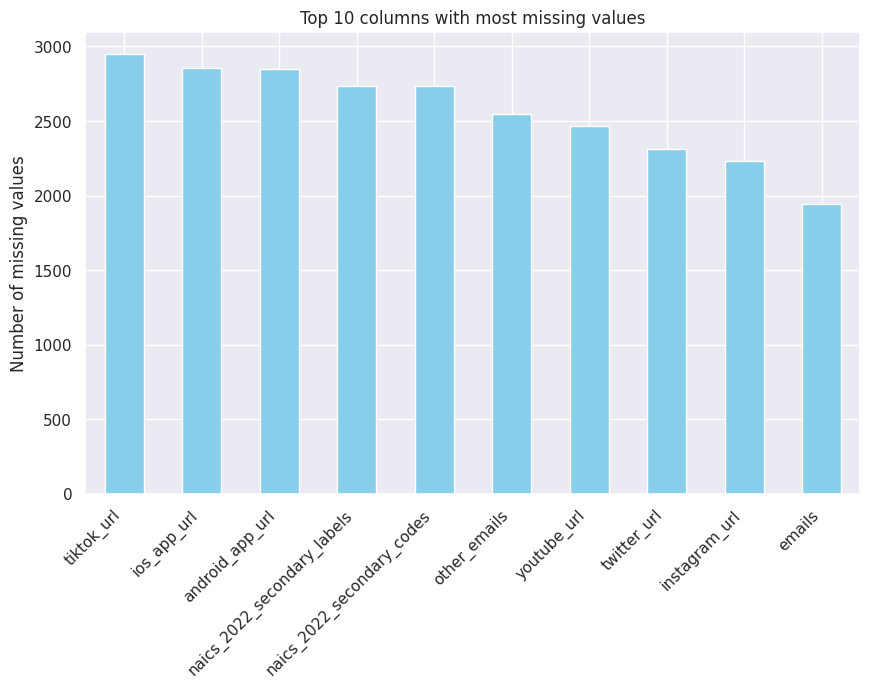

In [252]:
import matplotlib.pyplot as plt

missing_counts = df.isnull().sum().sort_values(ascending=False)
top_missing = missing_counts.head(10)

plt.figure(figsize=(10,6))
top_missing.plot(kind="bar", color="skyblue")
plt.title("Top 10 columns with most missing values")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45, ha="right")
plt.show()


## Duplicates

In [253]:
veridion_counts = df["veridion_id"].value_counts()

veridion_duplicates = veridion_counts[veridion_counts > 1]

print("Total number of duplicated veridion_id:", len(veridion_duplicates))
print(veridion_duplicates.head(20))

Total number of duplicated veridion_id: 180
veridion_id
01004641-1dd8-11ef-9268-316fc8e174dd    9
0131b200-93e5-11eb-a736-0f5b20ecb2f1    6
022d15df-2856-11ee-9d27-c15b737acd52    5
0316b2a0-da88-11ed-97f8-6d4e929b0114    5
0dd50431-93e5-11eb-90d2-e3355a7e800b    5
18792b00-93e5-11eb-8859-29e7c34dee35    4
d4d3de9b-2d28-11ed-abd0-cb4d1b9ef28b    4
28b4ac6a-b989-11ec-9415-2f89cc4d8f8b    4
06b6a8c3-93e5-11eb-b5f6-816dd10ac7b0    4
00c47152-93e5-11eb-a33a-a3dfba582839    4
02e95f1f-1cf4-11ed-9376-f7c7d0ba5a98    3
0e5f5346-ef74-11ee-a589-df5b398caaa4    3
359bd116-93e5-11eb-b5f6-816dd10ac7b0    3
01b51f89-e5a3-11ec-8626-6fdb733fde63    3
1c568f21-ef82-11ee-99aa-8b980cad1cb9    3
21833572-f08f-11ed-8127-1d0c65cd9855    3
f0699550-93e4-11eb-b89f-536884b3e7dd    3
83bcff00-93e4-11eb-b89f-536884b3e7dd    3
025411f0-93e5-11eb-be3a-7f925cb94351    3
03160489-1aff-11ec-b949-ef9d6b869404    3
Name: count, dtype: int64


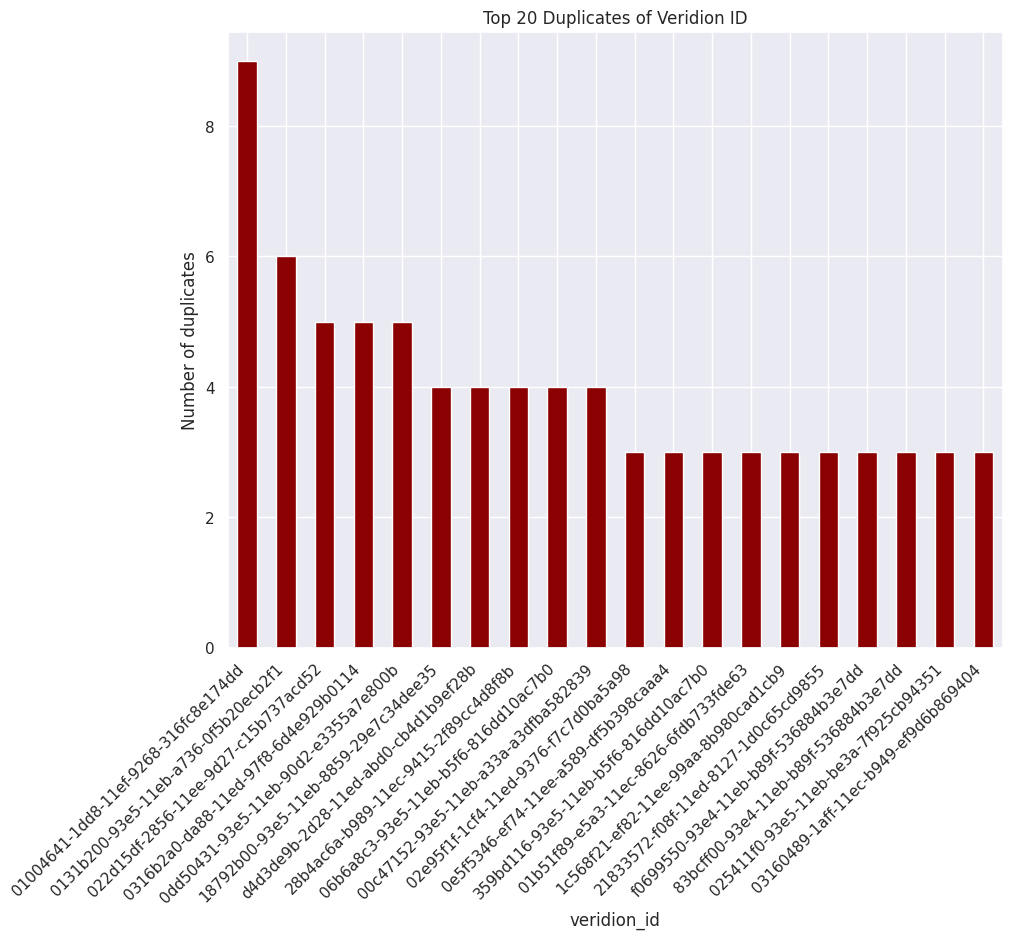

In [254]:
veridion_duplicates_bar = veridion_duplicates.head(20)

plt.figure(figsize=(10, 8))
veridion_duplicates_bar.plot(kind="bar", color="darkred")
plt.title("Top 20 Duplicates of Veridion ID")
plt.ylabel("Number of duplicates")
plt.xticks(rotation=45, ha="right")
plt.show()

## Outliers

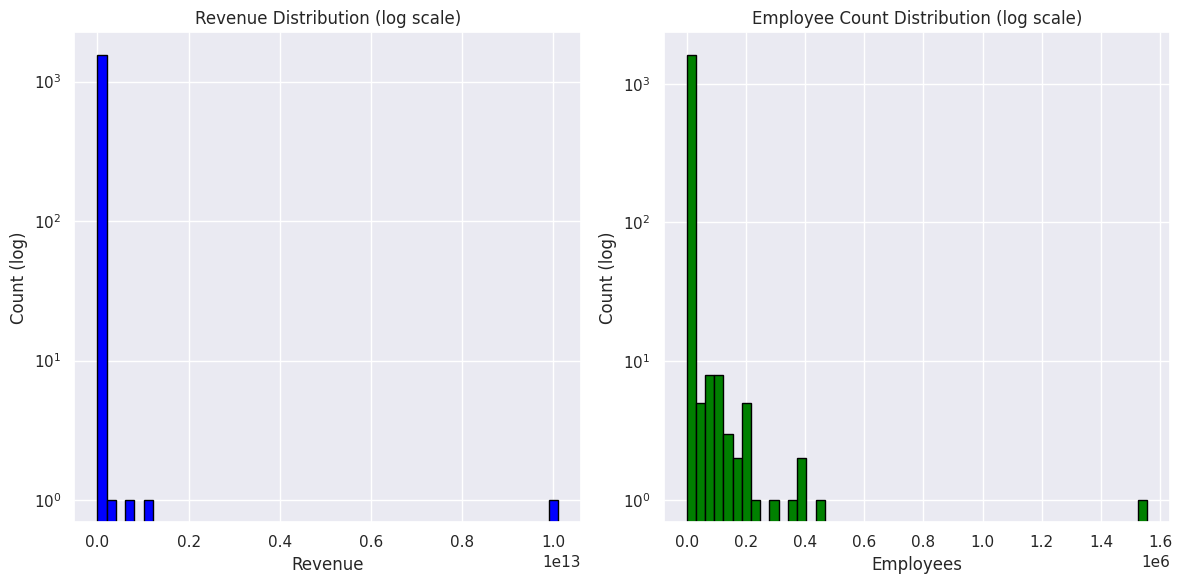

In [255]:
plt.figure(figsize=(12,6))

# Revenue
plt.subplot(1,2,1)
plt.hist(df["revenue"].dropna(), bins=50, log=True, color="blue", edgecolor="black")
plt.title("Revenue Distribution (log scale)")
plt.xlabel("Revenue")
plt.ylabel("Count (log)")

# Employee Count
plt.subplot(1,2,2)
plt.hist(df["employee_count"].dropna(), bins=50, log=True, color="green", edgecolor="black")
plt.title("Employee Count Distribution (log scale)")
plt.xlabel("Employees")
plt.ylabel("Count (log)")

plt.tight_layout()
plt.show()

In [256]:
# Top 10 companies by Revenue
top_revenue = df[["input_company_name", "company_name", "revenue", "employee_count"]].sort_values(by="revenue", ascending=False).head(10)

# Top 10 companies by Employee Count
top_employees = df[["input_company_name", "company_name", "revenue", "employee_count"]].sort_values(by="employee_count", ascending=False).head(10)

print("Top 10 Outliers by Revenue:")
display(top_revenue)

print("Top 10 Outliers by Employee Count:")
display(top_employees)

Top 10 Outliers by Revenue:


,input_company_name,company_name,revenue,employee_count
1861,Salling Group Forsikring A/S,Salling Group,1.011269e+13,60000.0
2567,Viaplay Group AB (publ),Viaplay Group,1.151112e+12,1708.0
1063,"AMAZON WEB SERVICES, INC.",Amazon,6.379000e+11,1556000.0
2738,Aviat Networks Japan LLC,AVIAT NETWORKS,2.438580e+11,708.0
1266,META PLATFORMS IRELAND LIMITED,Meta Platforms,1.645000e+11,74067.0
811,HUAWEI TECHNOLOGIES NORWAY AS,HUAWEI,9.960000e+10,207272.0
804,Huawei Technologies (Malaysia) Sdn. Bhd.,HUAWEI,9.960000e+10,207272.0
805,"HUAWEI TECHNOLOGIES (THAILAND) CO., LTD.",HUAWEI,9.960000e+10,207272.0
823,Huawei Technologies Sweden AB,HUAWEI,9.960000e+10,207272.0
791,Huawei Technologies (Bangladesh) Limited.,HUAWEI,9.960000e+10,207272.0


Top 10 Outliers by Employee Count:


,input_company_name,company_name,revenue,employee_count
1063,"AMAZON WEB SERVICES, INC.",Amazon,6.379000e+11,1556000.0
190,Deloitte Consulting (Sea) Sdn. Bhd.,Deloitte,6.490000e+10,457000.0
969,ISS Facility Services A/S,ISS,1.004979e+10,378946.0
981,ISS GLOBAL A/S,ISS,1.004979e+10,378946.0
1709,PRICEWATERHOUSECOOPERS AS,PwC South Africa,3.300000e+06,364000.0
2905,CHINA TELECOM GLOBAL LTD,China Telecom Global,2.400000e+06,287076.0
2618,WIPRO LIMITED,WIPRO,1.084712e+10,234054.0
805,"HUAWEI TECHNOLOGIES (THAILAND) CO., LTD.",HUAWEI,9.960000e+10,207272.0
823,Huawei Technologies Sweden AB,HUAWEI,9.960000e+10,207272.0
804,Huawei Technologies (Malaysia) Sdn. Bhd.,HUAWEI,9.960000e+10,207272.0


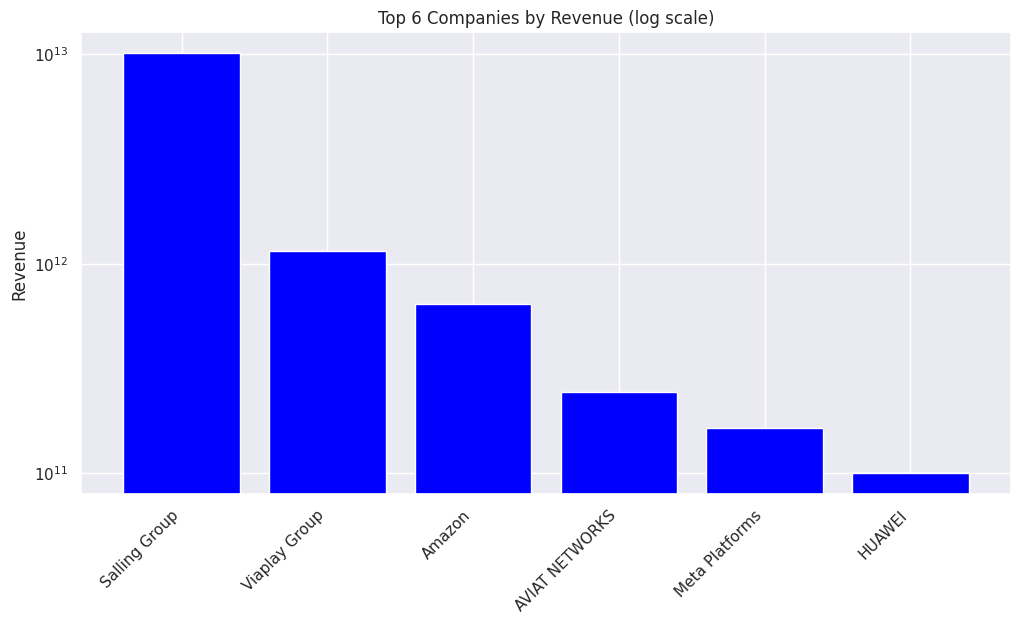

In [257]:
top_revenue = df[["input_company_name", "company_name", "revenue"]].sort_values(by="revenue", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_revenue["company_name"], top_revenue["revenue"], color="blue")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Top 6 Companies by Revenue (log scale)")
plt.ylabel("Revenue")
plt.show()

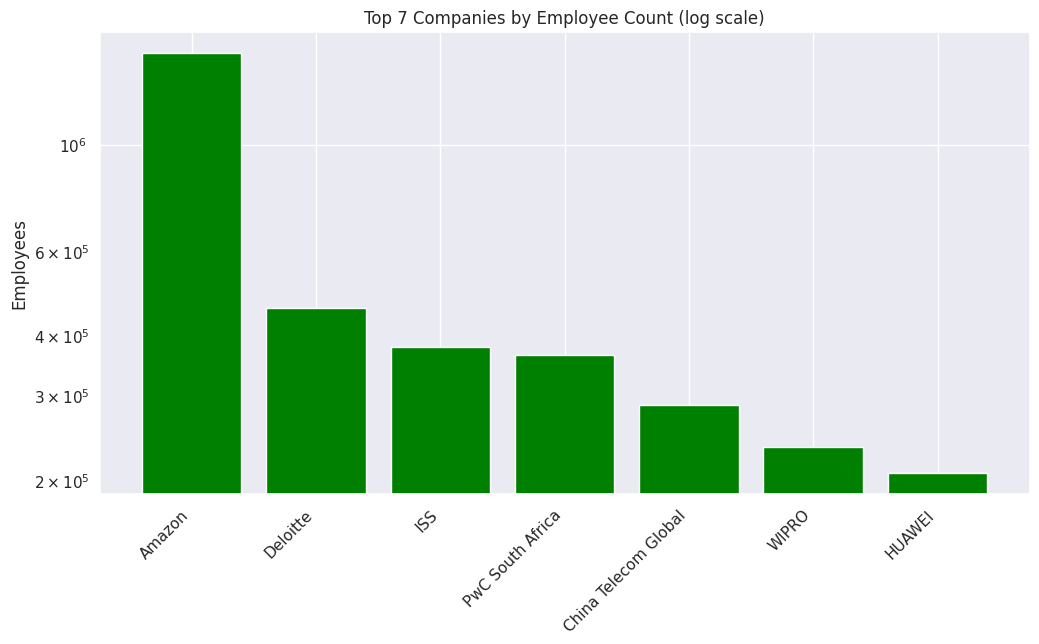

In [258]:
top_employees = df[["input_company_name", "company_name", "employee_count"]].sort_values(by="employee_count", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_employees["company_name"], top_employees["employee_count"], color="green")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Top 7 Companies by Employee Count (log scale)")
plt.ylabel("Employees")
plt.show()

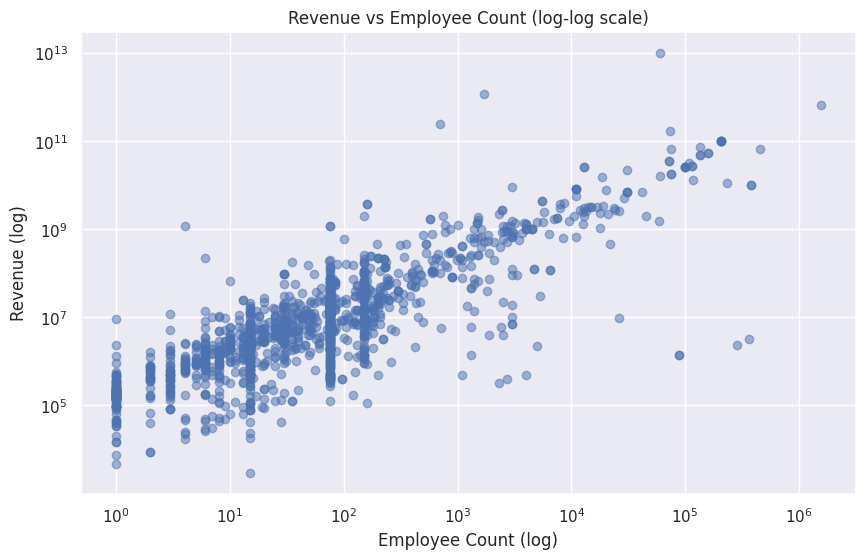

In [259]:
plt.figure(figsize=(10,6))
plt.scatter(df["employee_count"], df["revenue"], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Employee Count (log)")
plt.ylabel("Revenue (log)")
plt.title("Revenue vs Employee Count (log-log scale)")
plt.show()

Data Analysis – Revenue & Employee Count

To validate the numeric attributes in the dataset, I analyzed the distribution of **revenue** and **employee_count**.  

- Identified **outliers**: Amazon, Deloitte, ISS, Huawei and others stand out with exceptionally high values (revenues in trillions or workforce above 1M employees).  
- Plotted **log-scaled histograms and bar charts** to highlight skewed distributions.  
- Created a **scatter plot (revenue vs. employees)** which confirms the expected positive correlation: larger companies usually have higher revenues.  
- Outliers show possible anomalies, either due to real global-scale operations or due to **modelled/estimated values** in the dataset.  

**Conclusion:** Numeric fields are informative but contain extreme values that need QC attention before downstream use.


## Distribution Checks

In [260]:
df.head()

,input_row_key,input_company_name,input_main_country_code,input_main_country,input_main_region,input_main_city,input_main_postcode,input_main_street,input_main_street_number,veridion_id,company_name,company_legal_names,company_commercial_names,main_country_code,main_country,main_region,main_city,main_postcode,main_street,main_street_number,main_latitude,main_longitude,locations,num_locations,company_type,year_founded,revenue,revenue_type,employee_count,employee_count_type,generated_description,generated_business_tags,short_description,long_description,business_tags,naics_2022_primary_code,naics_2022_primary_label,naics_2022_secondary_codes,naics_2022_secondary_labels,main_business_category,main_industry,main_sector,sics_codified_industry,sics_codified_industry_code,sics_codified_subsector,sics_codified_subsector_code,sics_codified_sector,sics_codified_sector_code,sic_codes,sic_labels,ibc_insurance_labels,isic_v4_codes,isic_v4_labels,nace_rev2_codes,nace_rev2_labels,ibc_insurance_codes,primary_phone,phone_numbers,primary_email,emails,other_emails,website_url,website_domain,website_tld,website_language_code,facebook_url,twitter_url,instagram_url,linkedin_url,ios_app_url,android_app_url,youtube_url,tiktok_url,technologies,created_at,last_updated_at,country_consistent,city_consistent,name_consistent,name_score,country_match,city_region_match,website_match,total_score,candidate_status
0,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,26e22210-93e5-11eb-b997-8dd98d09cf25,New Millennium Network,New Millennium Network Private Limited | MNET ...,New Millennium Network,PK,Pakistan,Sindh,Karachi,74400,NaN,NaN,NaN,NaN,"PK, Pakistan, Sindh, Karachi, 74400, , , 24.85...",1.0,Private,2001.0,311793.0,modelled,23.0,extracted,"MNET, incorporated in 2001, is a Pakistani com...",Mobile Top-up Services | Website Development |...,"Incorporated in 2001, MNET is the first compan...","Incorporated in 2001, MNET is the first compan...",Transfer Funds | Shop & Products | Managed Ser...,517810.0,All Other Telecommunications,NaN,NaN,Cable & Internet Providers,Telecommunication Services,IT&C Services,Media & Entertainment,SV-ME,Media,SV.1,Services,SV,7375 | 4899,Information Retrieval Services (Internet servi...,NaN,6190,Other telecommunications activities,61.9,Other telecommunications activities,NaN,9.233351e+11,+923335055787,NaN,NaN,NaN,https://www.mnet.com.pk/,mnet.com.pk,com.pk,en,NaN,NaN,NaN,http://www.linkedin.com/company/mnet-services-...,NaN,NaN,NaN,NaN,web servers: apache http server - 2 | javascri...,2020-02-25T14:47:51.000Z,2024-11-29T04:18:00.109Z,True,True,False,0.590909,True,True,True,0.904545,CANDIDATE_MATCH
1,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,01004641-1dd8-11ef-9268-316fc8e174dd,Private Helipad Ali Villa,NaN,Private Helipad Ali Villa,PK,Pakistan,Sindh,Karachi,74400,NaN,NaN,NaN,NaN,"PK, Pakistan, Sindh, Karachi, 74400, , , 25.03...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,The Private Helipad Ali Villa is a heliport lo...,Air Transportation Services | Heliport Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-29T16:24:11.019Z,2025-04-20T15:03:24.026Z,True,True,False,0.297872,True,True,True,0.728723,CANDIDATE_UNLIKELY
2,0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,PK,Pakistan,Sindh,Karachi,NaN,NaN,NaN,8266efc1-13e7-11ec-aa14-7bf90e1e10f1,24seven Research Network,NaN,24seven Research Network,IN,India,Haryana,Faridabad,121001,Gurunanak Gali No. 3,3071,28.399705,77.286203,"IN, India, Haryana, Faridabad, 121001, Gurunan...",1.0,Private,NaN,518659.0,modelled,75.0,modelled,24seven Research Network is a market research ...,Market Research Services | Data Collection Ser...,We are the fastest growing market research com...,"With a team of highly skilled, qualified and m...",NaN,541910.0,Marketing Research and Public Opinion Polling,NaN,NaN,Market Research 

In [261]:
df["input_main_country"].unique()

array(['Pakistan', 'Denmark', 'Norway', 'Hong Kong', 'Malaysia',
       'Singapore', 'Switzerland', 'United States', 'India',
       'United Kingdom', 'Thailand', 'France', 'Ireland', 'China',
       'Finland', 'Sweden', 'Bangladesh', 'Poland', 'Germany', 'Canada',
       'South Korea', 'Luxembourg', 'Cyprus', 'Israel', 'Japan',
       'Netherlands', 'Hungary', 'Italy', 'Belgium', 'Malta',
       'United Arab Emirates', 'Serbia', 'Romania', 'Spain'], dtype=object)

Text(0, 0.5, 'Number of Countries')

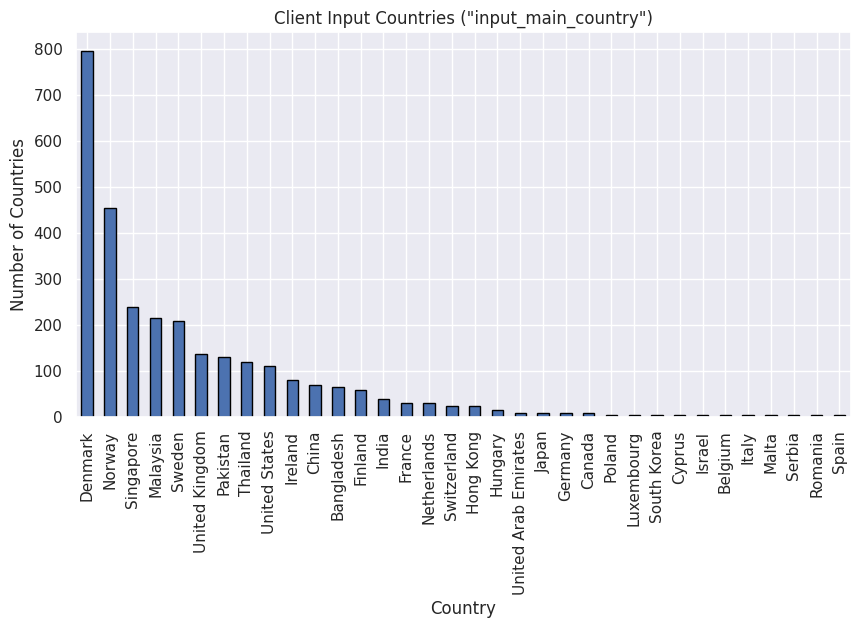

In [293]:
df["input_main_country"].value_counts().plot(kind="bar", figsize=(10, 5), edgecolor='black')
plt.title('Client Input Countries ("input_main_country")')
plt.xlabel("Country")
plt.ylabel("Number of Countries")

In [263]:
df["main_country"].unique()

array(['Pakistan', 'India', 'Denmark', nan, 'Ireland', 'Slovakia',
       'Mauritius', 'Norway', 'Canada', 'United States', 'Hong Kong',
       'Italy', 'Malaysia', 'United Kingdom', 'Singapore', 'Mexico',
       'Switzerland', 'South Africa', 'Kenya', 'Philippines', 'Sweden',
       'Japan', 'Netherlands', 'Germany', 'Hungary', 'Thailand', 'Benin',
       'France', 'China', 'Czechia', 'Paraguay', 'Brazil',
       'United Arab Emirates', 'Latvia', 'Bulgaria', 'Costa Rica',
       'Spain', 'Turkey', 'Finland', 'Myanmar', 'Greece', 'Georgia',
       'Nigeria', 'Bangladesh', 'Ukraine', 'New Zealand', 'Australia',
       'Croatia', 'Poland', 'Saint Vincent And The Grenadines', 'Russia',
       'Austria', 'Taiwan', 'Kazakhstan', 'Honduras', 'Chile',
       'Indonesia', 'Vietnam', 'Iceland', 'Colombia', 'Estonia',
       'Argentina', 'Belgium', 'Peru', 'South Korea', 'Tanzania',
       'Luxembourg', 'Egypt', 'Democratic Republic Of The Congo',
       'Portugal', 'Vanuatu', 'Israel', 'Nepal',

Text(0, 0.5, 'Number of Countries')

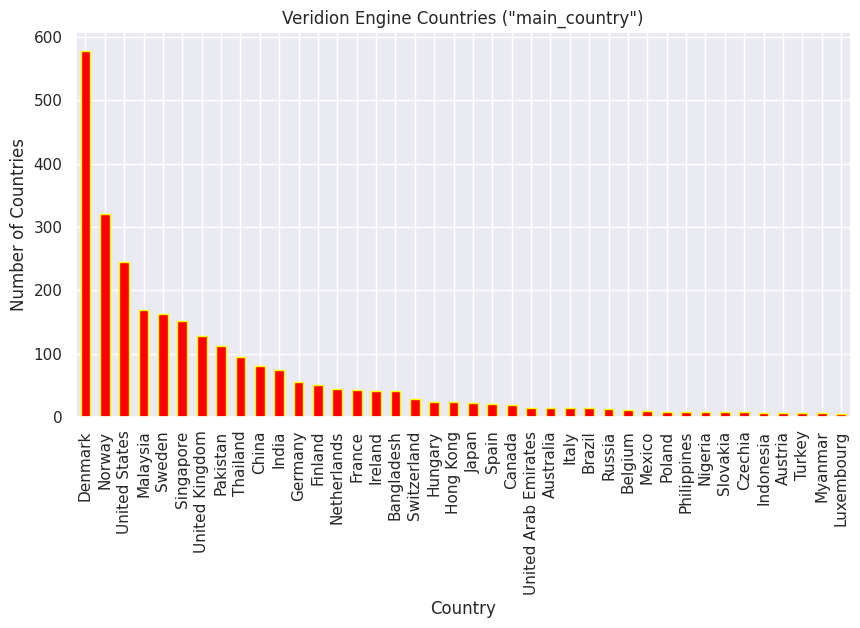

In [292]:
df["main_country"].dropna().value_counts().nlargest(40).plot(kind="bar", figsize=(10, 5), color='red', edgecolor='yellow')
plt.title('Veridion Engine Countries ("main_country")')
plt.xlabel("Country")
plt.ylabel("Number of Countries")

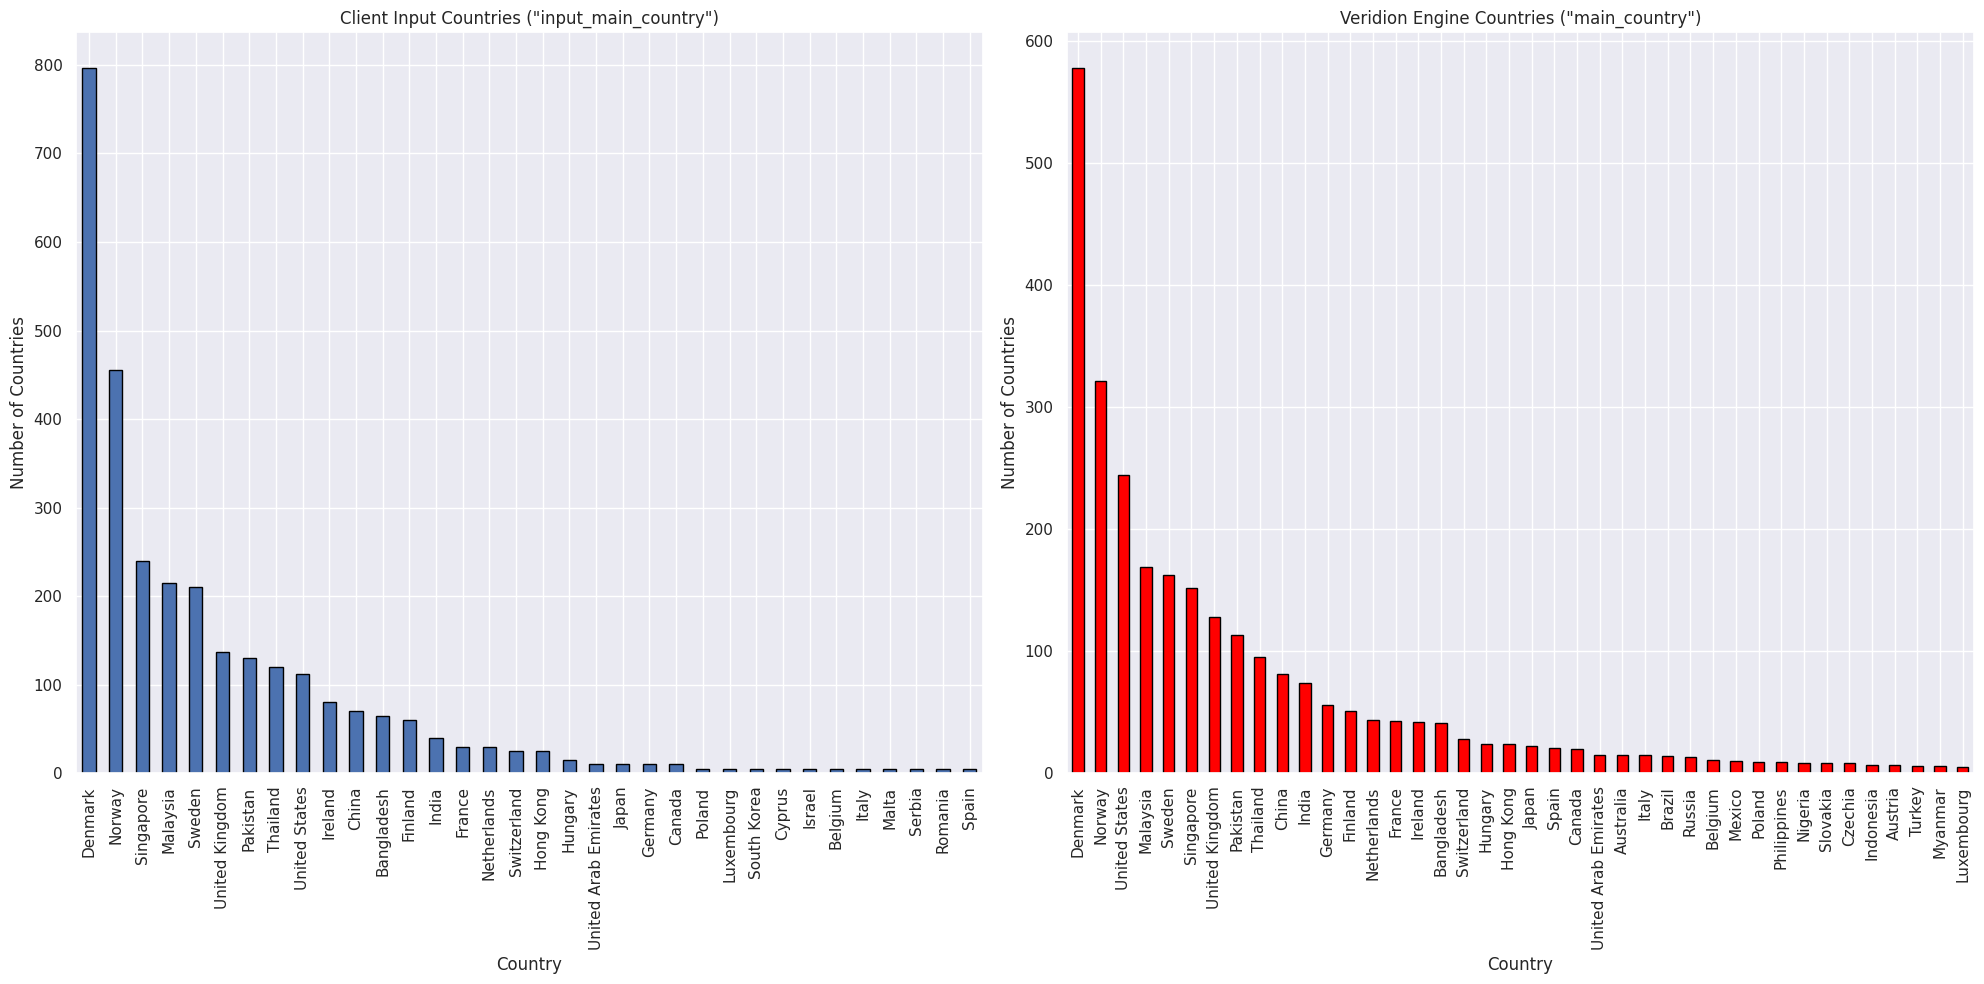

In [265]:
plt.figure(figsize=(20, 10))

# client input country ("input_main_country")
plt.subplot(1, 2, 1)
df["input_main_country"].value_counts().plot(kind="bar", edgecolor='black')
plt.title('Client Input Countries ("input_main_country")')
plt.xlabel("Country")
plt.ylabel("Number of Countries")

# Veridion Engine Countries ("main_country")
plt.subplot(1, 2, 2)
df["main_country"].dropna().value_counts().nlargest(40).plot(kind='bar', color='red', edgecolor='black')
plt.title('Veridion Engine Countries ("main_country")')
plt.xlabel("Country")
plt.ylabel("Number of Countries")

plt.tight_layout()
plt.show()

In [266]:
df['main_industry'].unique()

array(['Telecommunication Services', nan,
       'Marketing & Advertising Agencies', 'Digital Agencies',
       'Engineering Services', 'Professional Schools', 'Pharmaceuticals',
       'Medical Equipment & Supplies', 'Business Consulting', 'Clothing',
       'Industrial Machinery', 'Hospitals & Clinics',
       'Real Estate - Agents & Managers', 'Books Printing & Stores',
       'Accountants & Tax Services', 'Software & IT Services',
       'Passenger Transport Services', 'HR Services', 'Freight Transport',
       'Warehousing, Logistics & Support', 'Other Professional Services',
       'Investment Firms & Consultants', 'Entertainment', 'Education',
       'Translation & Legal Documents', 'Watches, Jewelry & Accessories',
       'Blogs & Publications', 'Banks & Financial Services',
       'Mental Health Specialists', 'Aerospace and Defence',
       'Social Services', 'Detectives & Investigation Services',
       'Other Durable Products', 'Newspapers & Magazines', 'Footwear',
       'A

In [267]:
df['main_industry'].isnull().sum()

np.int64(341)

Text(0, 0.5, 'Frequency')

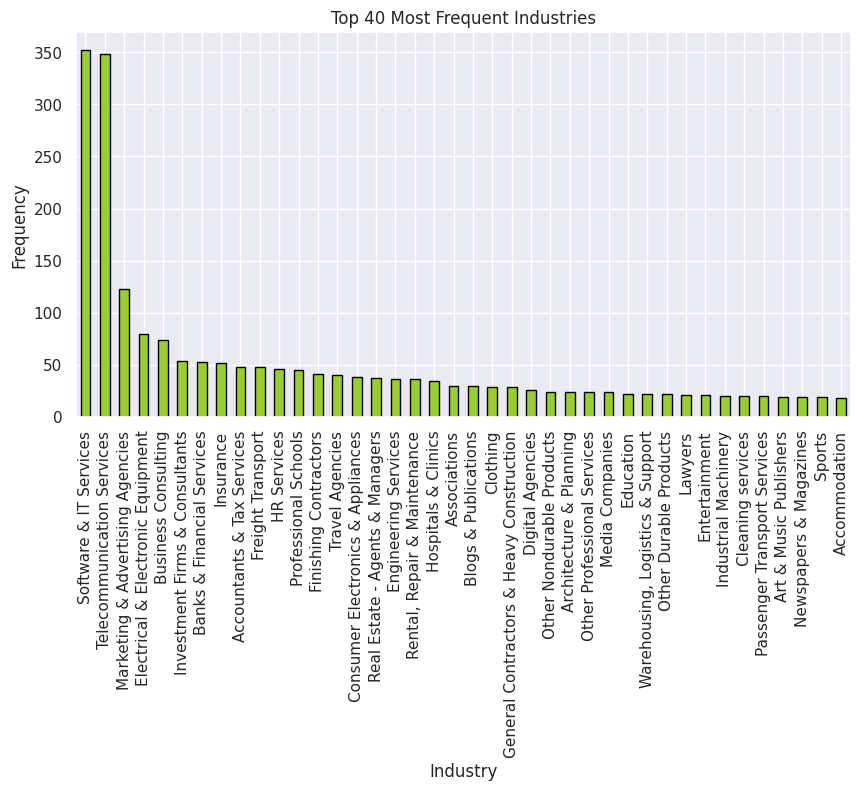

In [268]:
df["main_industry"].dropna().value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5), color='yellowgreen', edgecolor='black')
plt.title("Top 40 Most Frequent Industries")
plt.xlabel("Industry")
plt.ylabel("Frequency")

In [269]:
df["company_type"].unique()

array(['Private', nan, 'Public'], dtype=object)

In [270]:
df["company_type"].dropna().value_counts()

,count
company_type,
Private,2496
Public,83


Text(0, 0.5, 'Frequency')

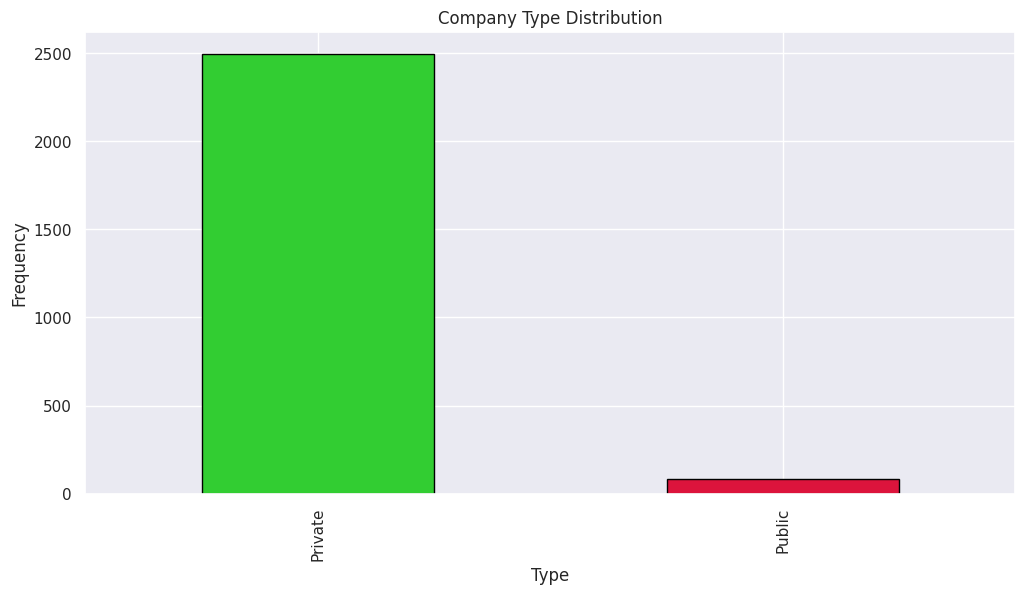

In [271]:
df["company_type"].dropna().value_counts().plot(kind='bar', figsize=(12, 6), color=('limegreen', 'crimson'), edgecolor='black')
plt.title("Company Type Distribution")
plt.xlabel("Type")
plt.ylabel("Frequency")

Distribution Checks – Summary

- **Countries**: The input and Veridion outputs are broadly aligned, with most companies coming from Denmark, Norway, and Singapore. Still, some deviations exist (e.g., Veridion maps more firms to the US), showing how the engine normalizes country data.  
- **Industries**: Strong concentration in **IT, Telecom, and Marketing**, meaning the dataset is highly biased towards these sectors. Insights will be more reliable here than in underrepresented industries.  
- **Company Type**: Most entities are **Private**, with only a small share of **Public** companies. This highlights a coverage imbalance that clients should be aware of.  

 **Insight**: Beyond cleaning issues (duplicates, outliers), distribution analysis reveals where the dataset is strongest and where coverage is limited. This adds context for how trustworthy and representative the data is for client use cases.


## Cross-Validation Logic

In [272]:
# Checking where employee_count_type is "modelled"
employee_modelled = df[df["employee_count_type"] == "modelled"][["input_company_name", "company_name", "employee_count", "employee_count_type"]]
print("Number of modelled employee counts:", len(employee_modelled))
employee_modelled.head(10)

Number of modelled employee counts: 832


,input_company_name,company_name,employee_count,employee_count_type
2,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,24seven Research Network,75.0,modelled
5,2OPERATE A/S,2operate,75.0,modelled
6,2OPERATE A/S,CO 2 Operate,15.0,modelled
7,2OPERATE A/S,Conzentrate,75.0,modelled
8,2OPERATE A/S,2A Pharma ApS.,35.0,modelled
9,2OPERATE A/S,RenSams Solutions,75.0,modelled
16,COMBA TELECOM LIMITED,Vasav Telecom,15.0,modelled
20,Comengineering Sdn. Bhd.,Metro Com Engineering S.p.A.,75.0,modelled
25,COMMSCOPE SOLUTIONS SINGAPORE PTE. LTD.,All Property Solutions Singapore,15.0,modelled
28,COMMSCOPE SOLUTIONS SINGAPORE PTE. LTD.,HOMENET,75.0,modelled


In [273]:
# Checking for inconsistency between website_url and domain/tld
website_inconsistency = df[(df["website_url"].notnull()) &
                           ((df["website_domain"].isnull()) | (df["website_tld"].isnull()))]

print("Number of website inconsistencies:", len(website_inconsistency))
website_inconsistency[["input_company_name", "company_name", "website_url", "website_domain", "website_tld"]].head(10)

Number of website inconsistencies: 0


,input_company_name,company_name,website_url,website_domain,website_tld


In [274]:
# Checking where revenue_type is "modelled"
revenue_modelled = df[df["revenue_type"] == "modelled"][["input_company_name", "company_name", "company_type", "revenue", "revenue_type"]]
print("Number of modelled revenue counts:", len(revenue_modelled))
revenue_modelled.head(10)

Number of modelled revenue counts: 1184


,input_company_name,company_name,company_type,revenue,revenue_type
0,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,New Millennium Network,Private,311793.0,modelled
2,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,24seven Research Network,Private,518659.0,modelled
4,24-SEVEN MEDIA NETWORK (PRIVATE) LIMITED,Asiatic Public Relations Network,Private,129640.0,modelled
5,2OPERATE A/S,2operate,Private,28698964.0,modelled
7,2OPERATE A/S,Conzentrate,Private,11133856.0,modelled
8,2OPERATE A/S,2A Pharma ApS.,Private,23532880.0,modelled
9,2OPERATE A/S,RenSams Solutions,Private,64390448.0,modelled
16,COMBA TELECOM LIMITED,Vasav Telecom,Private,3753175.0,modelled
20,Comengineering Sdn. Bhd.,Metro Com Engineering S.p.A.,Private,11273039.0,modelled
25,COMMSCOPE SOLUTIONS SINGAPORE PTE. LTD.,All Property Solutions Singapore,Private,5542795.0,modelled


 Attribute Consistency

We performed additional checks on specific attributes:

- **Employee Count**: 832 companies have a *modelled* employee count, meaning these values are estimates rather than officially reported numbers.  
- **Revenue**: 1184 companies have *modelled* revenue values, which should also be treated as approximations.  
- **Website Data**: No inconsistencies were found between `website_url`, `website_domain`, and `website_tld`, indicating high reliability for this attribute.  

 **Insight**: While website data is clean, financial and HR-related attributes often rely on modelled estimates. This distinction should be clearly communicated to the client, as it affects how much trust they can place in the numbers.


## Timeliness Check

In [275]:
# Parsing datetime columns (convert strings to datetime objects)
for col in ["created_at", "last_updated_at"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)

# Defining current timestamp (UTC) for comparison
now = pd.Timestamp.utcnow()

# Calculating record "age" in days and years
df["days_since_update"]  = (now - df["last_updated_at"]).dt.days
df["days_since_created"] = (now - df["created_at"]).dt.days
df["years_since_update"] = df["days_since_update"] / 365.25
df["years_since_created"] = df["days_since_created"] / 365.25

In [276]:
# Summarize timeliness statistics
def pct(x):
    return round(100 * x, 2)

n = len(df)
summary = {
    "rows": n,
    "missing_created_at_%": pct(df["created_at"].isna().mean()),
    "missing_last_updated_at_%": pct(df["last_updated_at"].isna().mean()),
    "median_days_since_update": float(np.nanmedian(df["days_since_update"])),
    "max_days_since_update": float(np.nanmax(df["days_since_update"])),
    "median_days_since_created": float(np.nanmedian(df["days_since_created"])),
    "min_created_at": str(df["created_at"].min()),
    "max_created_at": str(df["created_at"].max()),
    "min_last_updated_at": str(df["last_updated_at"].min()),
    "max_last_updated_at": str(df["last_updated_at"].max()),
}
summary

{'rows': 2951,
 'missing_created_at_%': np.float64(0.0),
 'missing_last_updated_at_%': np.float64(0.0),
 'median_days_since_update': 155.0,
 'max_days_since_update': 1203.0,
 'median_days_since_created': 1449.0,
 'min_created_at': '2019-11-23 22:05:50+00:00',
 'max_created_at': '2025-04-14 09:34:59+00:00',
 'min_last_updated_at': '2022-05-14 10:02:04+00:00',
 'max_last_updated_at': '2025-04-21 06:55:41.709000+00:00'}

In [277]:
# Bucketize freshness based on last_updated_at
def freshness_bucket(days):
    if pd.isna(days): return "missing"
    if days <= 90:    return "<= 90 days"
    if days <= 365:   return "91–365 days"
    if days <= 3*365: return "1–3 years"
    if days <= 5*365: return "3–5 years"
    return "> 5 years"

df["freshness_bucket"] = df["days_since_update"].apply(freshness_bucket)

bucket_counts = df["freshness_bucket"].value_counts().reindex(
    ["<= 90 days","91–365 days","1–3 years","3–5 years","> 5 years","missing"]
).fillna(0)

print("Freshness distribution (counts):")
print(bucket_counts.astype(int))
print("\nFreshness distribution (%):")
print((bucket_counts / bucket_counts.sum() * 100).round(2))

Freshness distribution (counts):
freshness_bucket
<= 90 days        0
91–365 days    2645
1–3 years       302
3–5 years         4
> 5 years         0
missing           0
Name: count, dtype: int64

Freshness distribution (%):
freshness_bucket
<= 90 days      0.00
91–365 days    89.63
1–3 years      10.23
3–5 years       0.14
> 5 years       0.00
missing         0.00
Name: count, dtype: float64


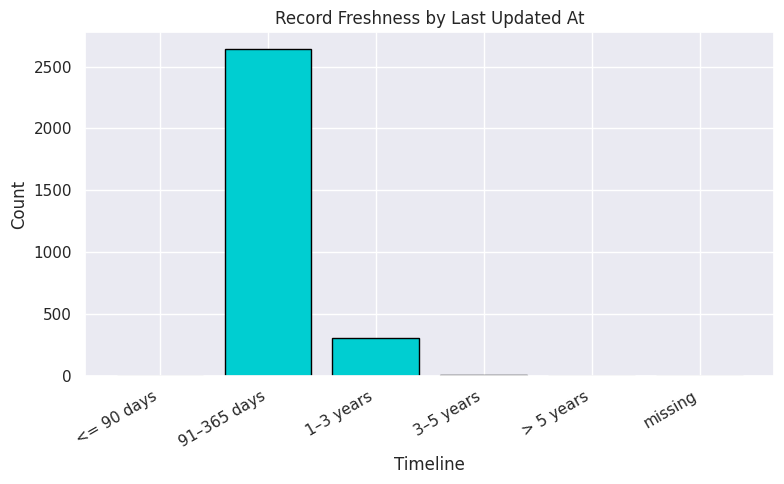

In [278]:
# Plotting a bar chart of record freshness
plt.figure(figsize=(8,5))
plt.bar(bucket_counts.index.astype(str), bucket_counts.values, color='darkturquoise', edgecolor='black')
plt.title("Record Freshness by Last Updated At")
plt.ylabel("Count")
plt.xlabel("Timeline")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [279]:
# Additional anomaly checks
# a) last_updated_at earlier than created_at (should not happen logically)
anomaly_order = df[(df["last_updated_at"].notna()) & (df["created_at"].notna()) & (df["last_updated_at"] < df["created_at"])]
print("\nAnomalies: last_updated_at < created_at (should not happen):", len(anomaly_order))

# b) Very stale records (>5 years old) – candidates for re-scraping
stale = df[df["days_since_update"] > 5*365]
print("Very stale rows (>5 years since last update):", len(stale))

# c) Fresh records (<=90 days) – considered highly reliable
fresh = df[df["days_since_update"] <= 90]
print("Fresh rows (<=90 days):", len(fresh))


Anomalies: last_updated_at < created_at (should not happen): 0
Very stale rows (>5 years since last update): 0
Fresh rows (<=90 days): 0


 Data Freshness Summary  

- **~90%** of records updated in the last year  
- **0%** updated in the last 90 days → dataset is **recent but not fresh**  
- **~10%** updated 1–3 years ago, **<1%** 3–5 years ago  
- **No anomalies** in timestamps (`created_at` / `last_updated_at`)  

**Insight:** Data is consistent and reliable overall, but freshness can be improved by ensuring more frequent updates (≤90 days) for critical suppliers.  


In [280]:
from scipy.stats import pearsonr, spearmanr

# Keep only rows with non-null values for both
corr_df = df[["revenue", "employee_count"]].dropna()

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(corr_df["revenue"], corr_df["employee_count"])

# Spearman correlation (monotonic relationship, more robust to outliers)
spearman_corr, spearman_p = spearmanr(corr_df["revenue"], corr_df["employee_count"])

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3e})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3e})")


Pearson correlation: 0.091 (p=3.656e-04)
Spearman correlation: 0.798 (p=0.000e+00)


In [281]:
from scipy.stats import pearsonr, spearmanr

# Keeping only rows with non-null values for both
corr_df = df[["revenue", "employee_count"]].dropna()

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(corr_df["revenue"], corr_df["employee_count"])

# Spearman correlation (monotonic relationship, more robust to outliers)
spearman_corr, spearman_p = spearmanr(corr_df["revenue"], corr_df["employee_count"])

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3e})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3e})")

Pearson correlation: 0.091 (p=3.656e-04)
Spearman correlation: 0.798 (p=0.000e+00)


<Axes: xlabel='revenue', ylabel='employee_count'>

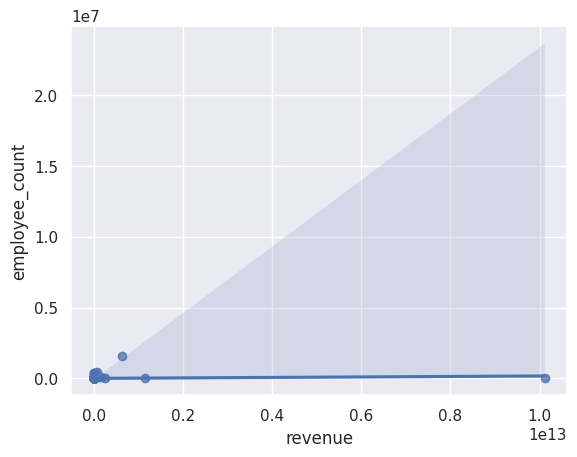

In [282]:
sns.regplot(x="revenue", y="employee_count", data=corr_df)

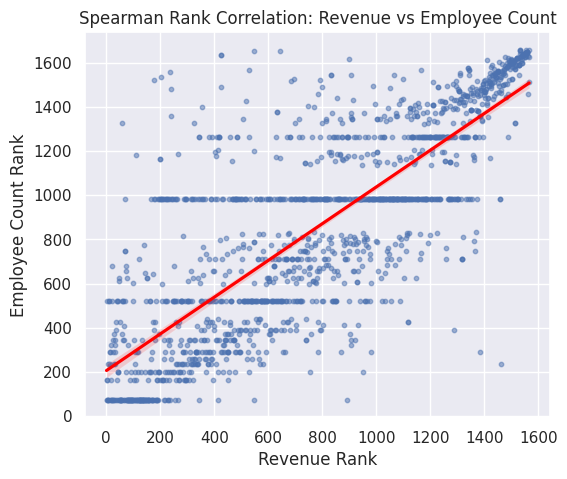

In [283]:
# Rank transform
df["revenue_rank"] = df["revenue"].rank()
df["employee_rank"] = df["employee_count"].rank()

plt.figure(figsize=(6,5))
sns.regplot(x="revenue_rank", y="employee_rank", data=df,
            scatter_kws={"s": 10, "alpha": 0.5}, line_kws={"color": "red"})
plt.title("Spearman Rank Correlation: Revenue vs Employee Count")
plt.xlabel("Revenue Rank")
plt.ylabel("Employee Count Rank")
plt.show()

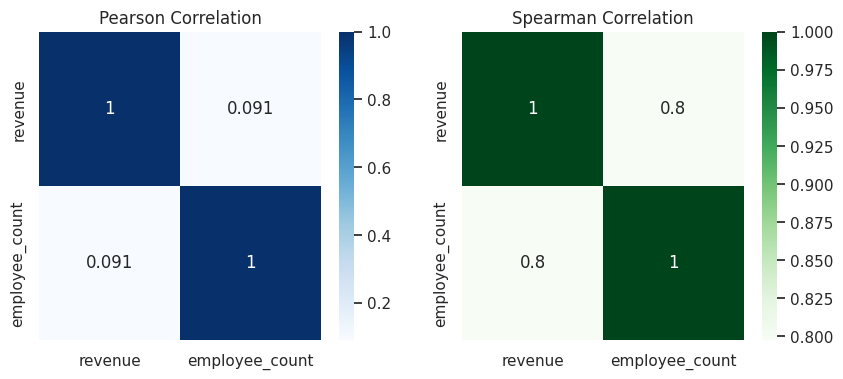

In [284]:
corr_pearson = df[["revenue", "employee_count"]].corr(method="pearson")
corr_spearman = df[["revenue", "employee_count"]].corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(corr_pearson, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Pearson Correlation")

sns.heatmap(corr_spearman, annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Spearman Correlation")

plt.show()

 Revenue vs Employee Count: Correlation Analysis

To test the relationship between **revenue** and **employee count**, I calculated both Pearson and Spearman correlations:

- **Pearson correlation = 0.09** → practically no linear relationship between revenue and employees.  
- **Spearman correlation = 0.80** → very strong monotonic relationship: companies with more employees tend to rank higher in revenue, even if the relationship is not strictly linear.

**Plots included**:  
- Pearson regplot: shows almost no clear linear trend.  
- Spearman rank plot: shows a strong monotonic increasing trend.  
- Correlation heatmaps for both Pearson and Spearman.

**Insight:**  
Revenue and employee count are not linearly related (Pearson), but their rankings are strongly aligned (Spearman). This suggests that while company size generally scales with workforce, industry-specific differences (e.g., tech vs. services) introduce significant variation in revenue per employee.


## Coverage Metrics for Supplier Contact Information

In [285]:
# Checking how complete are the supplier contact info (website, email, linkedin, phone)

key_fields = ["website_url", "primary_email", "linkedin_url", "phone_numbers"]

coverage = {}
for col in key_fields:
    coverage[col] = {
        "non_null_count": df[col].notnull().sum(),
        "total": len(df),
        "coverage_%": round(df[col].notnull().mean() * 100, 2)
    }

import pandas as pd
coverage_df = pd.DataFrame(coverage).T
coverage_df

,non_null_count,total,coverage_%
website_url,2280.0,2951.0,77.26
primary_email,1786.0,2951.0,60.52
linkedin_url,1337.0,2951.0,45.31
phone_numbers,2210.0,2951.0,74.89


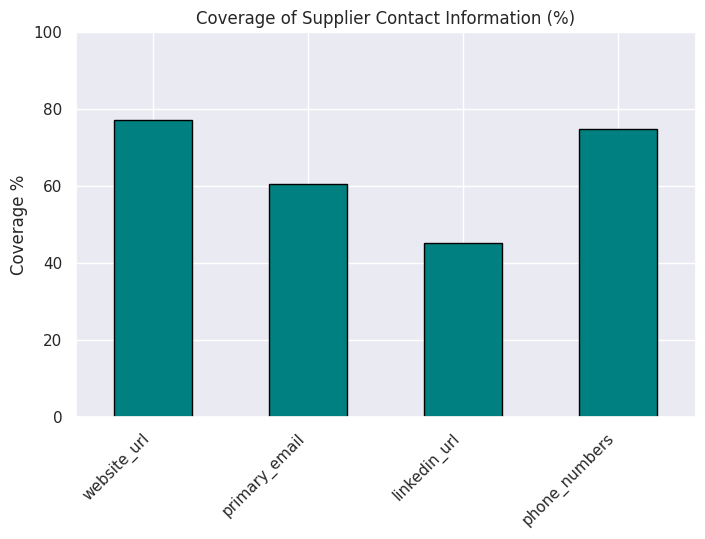

In [286]:
coverage_df["coverage_%"].plot(kind='bar', figsize=(8, 5), color='teal', edgecolor='black')
plt.title("Coverage of Supplier Contact Information (%)")
plt.ylabel("Coverage %")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

 Coverage Metrics for Supplier Contact Information

To assess data completeness, I evaluated the coverage of key supplier contact fields:  

- **Website URLs**: ~77% coverage – fairly reliable.  
- **Phone numbers**: ~75% coverage – strong presence.  
- **Primary emails**: ~61% coverage – moderate, potential gaps.  
- **LinkedIn profiles**: ~45% coverage – weakest field, showing limited availability.  

**Insight:** While basic fields like websites and phone numbers are well-covered, more strategic channels like LinkedIn have much lower coverage. This can impact advanced use cases such as digital engagement or automated enrichment.


## Data Analysis & Quality Check Summary

In this step, I systematically reviewed the dataset to identify issues in completeness, consistency, and reliability.  
The goal was not to fix everything, but to **diagnose quality problems** and understand how clean the dataset is.

### 1. Missing Values
- Checked all columns for missing values.  
- Found large gaps in fields like `year_founded`, `revenue`, `employee_count`, and social media links.  
 Important to flag because missing attributes reduce usability for downstream analytics.

### 2. Duplicates
- Checked for duplicates by `veridion_id`.  
- Found 180 IDs repeated across rows (e.g., Huawei, Telenor, Zalaris).  
 Suggests multiple subsidiaries or alternative names pointing to the same entity.

### 3. Outliers
- Used histograms, boxplots, and log scale plots for **revenue** and **employee_count**.  
- Identified extreme anomalies (e.g., trillions in revenue, >1.5M employees).  
 Indicates possible scraping or modelling errors.

### 4. Distribution Checks
- Compared **client input countries** vs. **Veridion countries**.  
- Reviewed **industries** and **company type (private vs public)** distributions.  
 Showed that the dataset is skewed toward Nordic and Asian suppliers, with strong dominance of private companies.

### 5. Cross-Validation Logic / Attribute Consistency (Internal Data Reliability)
- **Employee count**: 832 companies use *modelled* estimates.  
   - **Revenue**: 1184 companies use *modelled* estimates.  
   - **Website data** (`url`, `domain`, `tld`): internally consistent and reliable.  
   - Insight: website fields can be trusted, but revenue and employee figures should be treated as approximations when labelled as *modelled*.

### 6. Timeliness Check
- Assessed **record freshness** using `last_updated_at`.  
- ~90% updated within the last year, ~10% updated 1–3 years ago, none older than 5 years.  
 Data is fairly recent, but almost no records were updated in the last 90 days.

### 7. Coverage Metrics
- Evaluated availability of supplier contact information.  
- Coverage:  
  - Website ~77%  
  - Primary email ~61%  
  - LinkedIn ~45%  
  - Phone numbers ~75%  
 While websites and phones are mostly available, LinkedIn coverage is relatively weak.

---

### Next Steps (Not Implemented Here)
In a real project, further QC checks could include:  
- **Cross-referencing revenue/employee numbers** with external financial databases.  
- **Semantic checks** on industry classification codes (NAICS, NACE, SIC).  
- **Entity linkage validation** to ensure HQ and subsidiaries are properly grouped.  

For the scope of this challenge, I stopped at the seven main checks above.  


# 3. Data Cleaning (Optional for this challenge*)

## Step 1 - Handling Missing Values

In [287]:
df.isnull().sum()

,0
input_row_key,0
input_company_name,0
input_main_country_code,0
input_main_country,0
input_main_region,335
input_main_city,385
input_main_postcode,542
input_main_street,1017
input_main_street_number,1227
veridion_id,0


In [288]:
# Numeric columns to impute
numeric_cols = ["revenue", "employee_count", "year_founded"]

# Categorical columns to impute
categorical_cols = ["company_type"]

# Impute numeric columns with median
for col in numeric_cols:
    median_val = df[col].median()
    df[col + "_imputed"] = df[col].isnull()   # flag if imputed
    df[col] = df[col].fillna(median_val)

# Impute categorical columns with mode
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col + "_imputed"] = df[col].isnull()
    df[col] = df[col].fillna(mode_val)

# Quick check after imputation
df[categorical_cols + numeric_cols].isnull().sum()

,0
company_type,0
revenue,0
employee_count,0
year_founded,0


Data Cleaning – Handling Missing Values

I focused only on **critical fields** that are essential for quantitative analysis:

- **Numeric**: filled missing values in `revenue`, `employee_count`, and `year_founded` with the column median.  
- **Categorical**: filled missing values in `company_type` with the most frequent value (mode).  
- Added flags (`*_imputed`) to keep transparency of which rows were imputed.  

I did **not attempt to impute all missing fields** (e.g., descriptions, social media links, secondary codes), since these are non-critical attributes and imputing them would risk introducing artificial or misleading information.  
Instead, their absence is reported in the QC step as a **coverage issue**.  


## Step 2 - Deduplication by veridion_id

In [289]:
# Counting how many duplicates exist
duplicate_counts = df["veridion_id"].value_counts()
num_duplicates = (duplicate_counts > 1).sum()

print(f"Number of veridion_id with duplicates: {num_duplicates}")

# Dropping duplicates, keeping the first occurrence
before = len(df)
df_dedup = df.drop_duplicates(subset="veridion_id", keep="first")
after = len(df_dedup)

print(f"Rows before: {before}, Rows after deduplication: {after}")
print(f"Removed {before - after} duplicate rows")

Number of veridion_id with duplicates: 180
Rows before: 2951, Rows after deduplication: 2716
Removed 235 duplicate rows


Data Cleaning – Deduplication

- Deduplicated records by **`veridion_id`** (unique company identifier).  
- Removed duplicate rows, keeping only the first occurrence for each ID.  
- This ensures that every company in the dataset is represented only once, avoiding bias in downstream analysis.  


## Step 3 - Outlier Treatment: Revenue & Employee Count

In [290]:
numeric_cols = ["revenue", "employee_count"]
outlier_info = {}

for col in numeric_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)

    # Flag outliers
    df[col + "_outlier"] = (df[col] < q1) | (df[col] > q99)

    # Winsorize (cap values at 1st and 99th percentile)
    df[col + "_winsorized"] = df[col].clip(lower=q1, upper=q99)

    outlier_info[col] = {
        "q1": q1,
        "q99": q99,
        "num_outliers": int(df[col + "_outlier"].sum())
    }

outlier_info

{'revenue': {'q1': np.float64(48636.0),
  'q99': np.float64(17824249856.0),
  'num_outliers': 59},
 'employee_count': {'q1': np.float64(1.0),
  'q99': np.float64(74439.0),
  'num_outliers': 30}}

Data Cleaning – Outlier Treatment

For `revenue` and `employee_count`, I flagged outliers using the **1st and 99th percentiles** as thresholds:

- **Revenue**: values outside [48k, 17.8B] → 59 outliers.  
- **Employee count**: values outside [1, 74k] → 30 outliers.  

I created binary flags (`*_outlier`) and applied **winsorization** (capping to percentile limits) to reduce the influence of extreme anomalies while keeping all records.  

**Insight:**  
Outliers represent <3% of rows, but they heavily skew the distribution.  
By capping instead of removing them, the dataset remains representative while preventing large companies from dominating the analysis.


 Winsorization Explained

Instead of removing extreme outliers, I applied **winsorization**:  
- Values above the 99th percentile are capped at the 99th percentile.  
- Values below the 1st percentile are capped at the 1st percentile.  

This keeps all records in the dataset while reducing the distorting effect of extreme values on statistical analysis and visualizations.  

Boxplots below illustrate the difference between **original values** and **winsorized values** for both revenue and employee count.


/tmp/ipython-input-2855895148.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df["revenue"], df["revenue_winsorized"]], labels=["Original", "Winsorized"])
/tmp/ipython-input-2855895148.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df["employee_count"], df["employee_count_winsorized"]], labels=["Original", "Winsorized"])


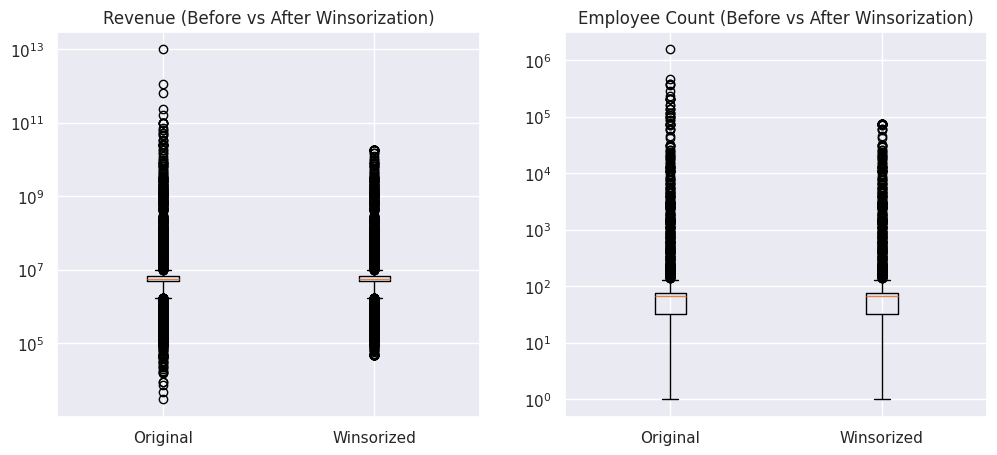

In [291]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Revenue before vs after
axes[0].boxplot([df["revenue"], df["revenue_winsorized"]], labels=["Original", "Winsorized"])
axes[0].set_title("Revenue (Before vs After Winsorization)")
axes[0].set_yscale("log")  # log scale for readability

# Employee count before vs after
axes[1].boxplot([df["employee_count"], df["employee_count_winsorized"]], labels=["Original", "Winsorized"])
axes[1].set_title("Employee Count (Before vs After Winsorization)")
axes[1].set_yscale("log")

plt.show()


## Data Cleaning Summary

In this step, I applied several data cleaning techniques to improve dataset quality and ensure consistency for downstream analysis.  
The focus was on addressing the most impactful issues without attempting to fully "fix" the dataset, since the goal is QC and analysis rather than production-ready cleaning.

### 1. Missing Values Imputation
- Filled missing values for **numeric columns** (`revenue`, `employee_count`, `year_founded`) with the **median**.  
- Filled missing values for **categorical columns** (`company_type`) with the **mode**.  
- Added **flag columns** (e.g., `revenue_imputed`) to keep track of imputed records.  
This allows us to maintain data usability while preserving transparency about which values were imputed.

### 2. Outlier Treatment
- Applied **winsorization** at the 1st and 99th percentile for `revenue` and `employee_count`.  
- This reduces the impact of extreme anomalies (e.g., trillions in revenue, millions of employees) while keeping the data distribution intact.  
Outliers were capped instead of removed to avoid losing potentially valid but extreme records.

### 3. Deduplication
- Checked for duplicate companies by **`veridion_id`** (unique company identifier).  
- Removed duplicates, keeping the first occurrence of each ID.  
This ensures each company is represented only once, preventing bias in analysis.

---

### Next Steps (Not Implemented Here)
If this were a real production cleaning pipeline, additional steps could include:
- **Standardizing categorical values** (e.g., harmonizing industry labels).  
- **Parsing and normalizing addresses** (street, postcode, region).  
- **Validating external links** (websites, social media) with regex or API calls.  
- **Handling multi-location companies** by expanding/normalizing the `locations` field.  

For the purpose of this challenge, I stopped at the three main cleaning steps above, since they already cover the most critical quality issues.  
